**Анализ продаж молочной продукции**

*Набор данных о продажах молочных товаров предоставляет подробный и всеобъемлющий сбор данных, касающихся молочных ферм, молочных продуктов, продаж и управления запасами. Этот набор данных включает в себя широкий спектр информации, включая местоположение фермы, земельную площадь, поголовье коров, размер фермы, даты производства, сведения о продукте, информацию о бренде, количества, цены, срок годности, условия хранения, сроки годности, информацию о продажах, местонахождение клиентов и т. д. каналы продаж, объемы запасов, пороговые значения запасов и объемы повторного заказа.*

***Функции***:
- Местоположение: Географическое положение молочной фермы.

- Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- Количество коров: количество коров на молочной ферме.

- Размер фермы: Размер молочной фермы (в кв.км).

- Дата: дата записи данных.

- Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- Название продукта: Название молочного продукта.

- Бренд: бренд, связанный с молочным продуктом.

- Количество (л/кг): Количество доступного молочного продукта.

- Цена за единицу: Цена за единицу молочного продукта.

- Общая стоимость: общая стоимость доступного количества молочного продукта.

- Срок годности (дни): Срок годности молочного продукта в днях.

- Условия хранения: Рекомендуемые условия хранения молочного продукта.

- Дата производства: дата производства молочного продукта.

- Дата истечения срока годности: дата истечения срока годности молочного продукта.

- Проданное количество (литры/кг): количество проданного молочного продукта.

- Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

***Потенциальный вариант ключевых показателей для анализа:***

- Анализ эффективности молочных ферм с учетом местоположения, площади земель и поголовья коров.

- Понимание моделей продаж и распределения различных молочных продуктов по различным брендам и регионам.

- Изучение влияния условий хранения и сроков годности на качество и доступность молочной продукции.

- Анализ предпочтений и покупательского поведения клиентов в зависимости от местоположения и каналов продаж.

- Оптимизация управления запасами путем отслеживания количества запасов, минимальных пороговых значений и количества повторных заказов.

- Проведение маркетинговых исследований и анализа тенденций в молочной отрасли.

- Разработка прогнозных моделей для прогнозирования спроса и стратегий ценообразования.

- ABC анализ продаж.

In [32]:
!pip install plotly


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\Batyl\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import pandas as pd 
import numpy as np 
from plotly import graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
import requests
from datetime import datetime
import warnings


In [34]:
warnings.simplefilter(action='ignore', category=Warning)

*Загружаем dataset с локального диска*

In [35]:
df = pd.read_csv("A:\LEARNING\Diplom_GB\Вар2_Продажа молочной продукции\dairy_dataset.csv", sep=",", decimal=",")
df.sample(1)

Location Total Land Area (acres)  Number of Cows Farm Size        Date  Product ID Product Name  Brand Quantity (liters/kg) Price per Unit Total Value  Shelf Life (days) Storage Condition Production Date Expiration Date  Quantity Sold (liters/kg) Price per Unit (sold)  \
666  Jharkhand                   673.9              95     Large  2019-06-12          10         Ghee  Sudha               327.49          91.05  29817.9645                 71           Ambient      2019-05-16      2019-07-26                        226                 86.66   

    Approx. Total Revenue(INR) Customer Location Sales Channel  Quantity in Stock (liters/kg) Minimum Stock Threshold (liters/kg) Reorder Quantity (liters/kg)  
666                   19585.16             Delhi        Online                            101                               96.27                       153.59

*Производим корректировку названия столбцов, для удобства*

In [36]:
df = df.rename(columns={'Location': 'Loc', 
          'Total Land Area (acres)' : 'Tot_Land_Area',
          'Number of Cows' : 'Num_of_Cows',
          'Farm Size' : 'Farm_Size',
          'Date' : 'Date',
          'Product ID' : 'Prod_ID',
          'Product Name' : 'Prod_Name',
          'Brand' : 'Brand',
          'Quantity (liters/kg)' : 'Quan',
          'Price per Unit' : 'Price_per_Unit',
          'Total Value' : 'Tot_Value',
          'Shelf Life (days)' : 'Shelf_Life',
          'Storage Condition' : 'Storage_Con',
          'Production Date' : 'Prod_Date',
          'Expiration Date' : 'Exp_Date',
          'Quantity Sold (liters/kg)' : 'Quan_Sold',
          'Price per Unit (sold)' : 'Price_per_Unit(sold)',
          'Approx. Total Revenue(INR)' : 'INR',
          'Customer Location' : 'Cust_Loc',
          'Sales Channel' : 'Sales_Channel',
          'Quantity in Stock (liters/kg)' : 'Quan_in_Stock',
          'Minimum Stock Threshold (liters/kg)' : 'Min_Stock_Threshold',
          'Reorder Quantity (liters/kg)' : 'Reo_Quan'})

In [37]:
df.head(1)

Loc Tot_Land_Area  Num_of_Cows Farm_Size        Date  Prod_ID  Prod_Name        Brand   Quan Price_per_Unit  Tot_Value  Shelf_Life Storage_Con   Prod_Date    Exp_Date  Quan_Sold Price_per_Unit(sold)     INR        Cust_Loc Sales_Channel  Quan_in_Stock Min_Stock_Threshold Reo_Quan
0  Telangana        310.84           96    Medium  2022-02-17        5  Ice Cream  Dodla Dairy  222.4          85.72  19064.128          25      Frozen  2021-12-27  2022-01-21          7                82.24  575.68  Madhya Pradesh     Wholesale            215               19.55    64.03

*Делаем вывод всех столбцов*

In [38]:
pd.set_option('display.max_columns', 30)


*Подгоняем ширину дисплея*

In [39]:
pd.set_option('display.width', 300)

*Убираем ограничение вывода количества строк на экран*

In [40]:
pd.set_option('display.max_rows', None)

In [41]:
df.head(1)

Loc Tot_Land_Area  Num_of_Cows Farm_Size        Date  Prod_ID  Prod_Name        Brand   Quan Price_per_Unit  Tot_Value  Shelf_Life Storage_Con   Prod_Date    Exp_Date  Quan_Sold Price_per_Unit(sold)     INR        Cust_Loc Sales_Channel  Quan_in_Stock Min_Stock_Threshold Reo_Quan
0  Telangana        310.84           96    Medium  2022-02-17        5  Ice Cream  Dodla Dairy  222.4          85.72  19064.128          25      Frozen  2021-12-27  2022-01-21          7                82.24  575.68  Madhya Pradesh     Wholesale            215               19.55    64.03

**Производим знакомство с датасетом, выводим одну строку, изучаем данные, определяем дальнейшие шаги(этапы)**

*Кол-во строк в датасете*

In [42]:
len(df)

4325

*Кол-во столбцов в датасете*

In [43]:
len(df.columns)

23

*Выводим наименование столбцов*

In [44]:
df.columns

Index(['Loc', 'Tot_Land_Area', 'Num_of_Cows', 'Farm_Size', 'Date', 'Prod_ID', 'Prod_Name', 'Brand', 'Quan', 'Price_per_Unit', 'Tot_Value', 'Shelf_Life', 'Storage_Con', 'Prod_Date', 'Exp_Date', 'Quan_Sold', 'Price_per_Unit(sold)', 'INR', 'Cust_Loc', 'Sales_Channel', 'Quan_in_Stock',
       'Min_Stock_Threshold', 'Reo_Quan'],
      dtype='object')

*Выводим кол-во ферм, согласно каждой локации.*

In [45]:
df['Loc'].unique()

array(['Telangana', 'Uttar Pradesh', 'Tamil Nadu', 'Maharashtra',
       'Karnataka', 'Bihar', 'West Bengal', 'Madhya Pradesh',
       'Chandigarh', 'Delhi', 'Gujarat', 'Kerala', 'Jharkhand',
       'Rajasthan', 'Haryana'], dtype=object)

In [46]:
df['Loc'].nunique()

15

*Выводим информацию по бренду*

In [47]:
df['Brand'].unique()

array(['Dodla Dairy', 'Amul', 'Britannia Industries', 'Mother Dairy',
       'Raj', 'Dynamix Dairies', 'Sudha', 'Passion Cheese', 'Warana',
       'Palle2patnam', 'Parag Milk Foods'], dtype=object)

In [48]:
df['Brand'].nunique()

11

*Изучаем тип продукции*

In [49]:
df['Prod_Name'].unique()

array(['Ice Cream', 'Milk', 'Yogurt', 'Cheese', 'Buttermilk', 'Curd',
       'Paneer', 'Lassi', 'Ghee', 'Butter'], dtype=object)

*Изучаем локации конечных покупателей*

In [50]:
df['Cust_Loc'].unique()

array(['Madhya Pradesh', 'Kerala', 'Rajasthan', 'Jharkhand', 'Gujarat',
       'Karnataka', 'Haryana', 'Tamil Nadu', 'West Bengal', 'Telangana',
       'Chandigarh', 'Maharashtra', 'Delhi', 'Bihar', 'Uttar Pradesh'],
      dtype=object)

In [51]:
df['Cust_Loc'].nunique()

15

*Каналы продаж*

In [52]:
df['Sales_Channel'].unique()

array(['Wholesale', 'Online', 'Retail'], dtype=object)

**Вывод: тип продукции - 'Ice Cream' - Мороженое, 'Milk' - Молоко, 'Yogurt' - Йогурт, 'Cheese' - Сыр,
'Buttermilk' - Пахта, 'Curd' - Творог, 'Paneer' - Панир, 'Lassi' - Лассии, 'Ghee' - Топлёное масло, 'Butter' - Масло.**

**Каналы продаж - 'Wholesale' -оптовая, 'Online' - онлайн, 'Retail' - розница.**

**Локация ферм - 'Telangana', 'Uttar Pradesh', 'Tamil Nadu', 'Maharashtra',
       'Karnataka', 'Bihar', 'West Bengal', 'Madhya Pradesh',
       'Chandigarh', 'Delhi', 'Gujarat', 'Kerala', 'Jharkhand',
       'Rajasthan', 'Haryana'.**

***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

**Типы данных - одна из тех вещей, о которых, как правило, не заботятся, пока не получат ошибку или неожиданные результаты!!!**

In [53]:
df.shape

(4325, 23)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Loc                   4325 non-null   object
 1   Tot_Land_Area         4325 non-null   object
 2   Num_of_Cows           4325 non-null   int64 
 3   Farm_Size             4325 non-null   object
 4   Date                  4325 non-null   object
 5   Prod_ID               4325 non-null   int64 
 6   Prod_Name             4325 non-null   object
 7   Brand                 4325 non-null   object
 8   Quan                  4325 non-null   object
 9   Price_per_Unit        4325 non-null   object
 10  Tot_Value             4325 non-null   object
 11  Shelf_Life            4325 non-null   int64 
 12  Storage_Con           4325 non-null   object
 13  Prod_Date             4325 non-null   object
 14  Exp_Date              4325 non-null   object
 15  Quan_Sold             4325 non-null   

*Произвел корректировку по типу данных, для проведения полного анализа*

In [55]:
df[['Tot_Land_Area', 'Quan']]= df[['Tot_Land_Area', 'Quan']].astype(float)
df[['Date', 'Prod_Date', 'Exp_Date']] = df[['Date', 'Prod_Date', 'Exp_Date']].astype('datetime64[ns]')
df[['Price_per_Unit']]= df[['Price_per_Unit']].astype(float)
df[['Tot_Value']]= round(df[['Tot_Value']], 1).astype(float)
df[['Price_per_Unit(sold)']]= round(df[['Price_per_Unit(sold)']], 1).astype(float)
df[['INR']]= round(df[['INR']], 1).astype(float)
df[['Min_Stock_Threshold', 'Reo_Quan']]= round(df[['Min_Stock_Threshold', 'Reo_Quan']], 2).astype(float)

In [56]:
df.head(1)

Loc  Tot_Land_Area  Num_of_Cows Farm_Size       Date  Prod_ID  Prod_Name        Brand   Quan  Price_per_Unit  Tot_Value  Shelf_Life Storage_Con  Prod_Date   Exp_Date  Quan_Sold  Price_per_Unit(sold)     INR        Cust_Loc Sales_Channel  Quan_in_Stock  Min_Stock_Threshold  Reo_Quan
0  Telangana         310.84           96    Medium 2022-02-17        5  Ice Cream  Dodla Dairy  222.4           85.72  19064.128          25      Frozen 2021-12-27 2022-01-21          7                 82.24  575.68  Madhya Pradesh     Wholesale            215                19.55     64.03

In [57]:
df.dtypes

Loc                             object
Tot_Land_Area                  float64
Num_of_Cows                      int64
Farm_Size                       object
Date                    datetime64[ns]
Prod_ID                          int64
Prod_Name                       object
Brand                           object
Quan                           float64
Price_per_Unit                 float64
Tot_Value                      float64
Shelf_Life                       int64
Storage_Con                     object
Prod_Date               datetime64[ns]
Exp_Date                datetime64[ns]
Quan_Sold                        int64
Price_per_Unit(sold)           float64
INR                            float64
Cust_Loc                        object
Sales_Channel                   object
Quan_in_Stock                    int64
Min_Stock_Threshold            float64
Reo_Quan                       float64
dtype: object

*Проверяем и удаляем дубликаты*

In [58]:
def check_duplicate(df):
    if df.duplicated().all():
        return  'Имеются повторяющиеся данные, которые необходимо удалить.' 
    else :
        return 'Дубликатов нет, повторяющие данные удалили'
check_duplicate(df)

'Дубликатов нет, повторяющие данные удалили'

*Проверяем*

In [59]:
df.isnull().sum().sort_values(ascending=False)

Loc                     0
Storage_Con             0
Min_Stock_Threshold     0
Quan_in_Stock           0
Sales_Channel           0
Cust_Loc                0
INR                     0
Price_per_Unit(sold)    0
Quan_Sold               0
Exp_Date                0
Prod_Date               0
Shelf_Life              0
Tot_Land_Area           0
Tot_Value               0
Price_per_Unit          0
Quan                    0
Brand                   0
Prod_Name               0
Prod_ID                 0
Date                    0
Farm_Size               0
Num_of_Cows             0
Reo_Quan                0
dtype: int64

*Определяем уникальных значений в каждом стобце*

In [60]:
df.nunique()

Loc                       15
Tot_Land_Area           4235
Num_of_Cows               91
Farm_Size                  3
Date                    1278
Prod_ID                   10
Prod_Name                 10
Brand                     11
Quan                    4224
Price_per_Unit          3409
Tot_Value               4325
Shelf_Life               146
Storage_Con                5
Prod_Date               1405
Exp_Date                1441
Quan_Sold                806
Price_per_Unit(sold)    3446
INR                     4304
Cust_Loc                  15
Sales_Channel              3
Quan_in_Stock            808
Min_Stock_Threshold     3432
Reo_Quan                3833
dtype: int64

**Вывод: пропусков (нулевых) значений нет, тип данных преобразован в datetime64[ns], float64, int64**

*Работа с датой и время, формируем новый датасет df_date*

In [61]:
df_date = df[['Loc', 'Prod_Name', 'Tot_Value', 'INR', 'Date', 'Prod_Date', 'Exp_Date']]
df_date.head(1)

Loc  Prod_Name  Tot_Value     INR       Date  Prod_Date   Exp_Date
0  Telangana  Ice Cream  19064.128  575.68 2022-02-17 2021-12-27 2022-01-21

In [62]:
df_date.dtypes

Loc                  object
Prod_Name            object
Tot_Value           float64
INR                 float64
Date         datetime64[ns]
Prod_Date    datetime64[ns]
Exp_Date     datetime64[ns]
dtype: object

In [63]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Loc        4325 non-null   object        
 1   Prod_Name  4325 non-null   object        
 2   Tot_Value  4325 non-null   float64       
 3   INR        4325 non-null   float64       
 4   Date       4325 non-null   datetime64[ns]
 5   Prod_Date  4325 non-null   datetime64[ns]
 6   Exp_Date   4325 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(2), object(2)
memory usage: 236.6+ KB


In [64]:
df_date['Tot_Value'].sum()

118322681.403

*Вывод общей стоимости доступного количества молочной продукции за весь период с 2019-2022 г.*

In [65]:
df_date['INR'].sum()

58734647.86000001

In [66]:
df['Quan'].sum()

2165322.74

In [67]:
df['Quan_Sold'].sum()

1073011

In [68]:
df['Quan_in_Stock'].sum()

1090197

In [69]:
df_date_Quan_Sold = df_date.copy(deep=True)

In [70]:
df_date_Quan_Sold['Quan_Sold*Price_per_Unit(sold)']=df['Quan_Sold'] * df['Price_per_Unit(sold)']

In [71]:
df_date_Quan_Sold['Quan_Sold*Price_per_Unit(sold)'].sum()

58734647.86000001

**Вывод: приблизительный (прогнозный) доход, равен сумме проданных продуктов**

*Выделяем  день, месяц, год*

In [72]:
df_date.Date.dt.month.head(5)

0     2
1    12
2     2
3     6
4    12
Name: Date, dtype: int32

In [73]:
df_date['Date'].dt.year.sample(5)

2828    2021
73      2022
2986    2020
411     2020
1473    2022
Name: Date, dtype: int32

*Добавляем в датасет*

In [74]:
df_date['Date_name'] = df.Date.dt.day_name()
df_date['Date_year'] = df.Date.dt.year
df_date['Date_month'] = df.Date.dt.month
df_date.head(5)

Loc   Prod_Name   Tot_Value       INR       Date  Prod_Date   Exp_Date  Date_name  Date_year  Date_month
0      Telangana   Ice Cream  19064.1280    575.68 2022-02-17 2021-12-27 2022-01-21   Thursday       2022           2
1  Uttar Pradesh        Milk  29293.5228  21895.92 2021-12-01 2021-10-03 2021-10-25  Wednesday       2021          12
2     Tamil Nadu      Yogurt  18377.0200   8655.36 2022-02-28 2022-01-14 2022-02-13     Monday       2022           2
3      Telangana      Cheese  21835.5072  17380.92 2019-06-09 2019-05-15 2019-07-26     Sunday       2019           6
4    Maharashtra  Buttermilk  12390.5145  12045.15 2020-12-14 2020-10-17 2020-10-28     Monday       2020          12

In [75]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Loc         4325 non-null   object        
 1   Prod_Name   4325 non-null   object        
 2   Tot_Value   4325 non-null   float64       
 3   INR         4325 non-null   float64       
 4   Date        4325 non-null   datetime64[ns]
 5   Prod_Date   4325 non-null   datetime64[ns]
 6   Exp_Date    4325 non-null   datetime64[ns]
 7   Date_name   4325 non-null   object        
 8   Date_year   4325 non-null   int32         
 9   Date_month  4325 non-null   int32         
dtypes: datetime64[ns](3), float64(2), int32(2), object(3)
memory usage: 304.2+ KB


***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

*Произвел группировку по году с выводом общего дохода*

*Сравнил приблизительный доход с фактическим доходом от продажи стоимости продукта и кол-ва проданного*

In [76]:
df_date['Quan_Sold*Price_sold'] = df['Quan_Sold'] * df['Price_per_Unit(sold)']


In [77]:
df_date.head(2)

Loc  Prod_Name   Tot_Value       INR       Date  Prod_Date   Exp_Date  Date_name  Date_year  Date_month  Quan_Sold*Price_sold
0      Telangana  Ice Cream  19064.1280    575.68 2022-02-17 2021-12-27 2022-01-21   Thursday       2022           2                575.68
1  Uttar Pradesh       Milk  29293.5228  21895.92 2021-12-01 2021-10-03 2021-10-25  Wednesday       2021          12              21895.92

In [78]:
df_date_month = df_date.groupby(['Date_month']).agg({'INR':'sum', 'Quan_Sold*Price_sold':'sum'}).reset_index().sort_values(by='INR', ascending=False)
df_date_month.head(5)

Date_month         INR  Quan_Sold*Price_sold
0            1  5916404.03            5916404.03
8            9  5387457.44            5387457.44
5            6  5345065.14            5345065.14
1            2  5179927.29            5179927.29
11          12  5151758.01            5151758.01

In [48]:
df_date_year = df_date.groupby(['Date_year']).agg({'INR':'sum', 'Quan_Sold*Price_sold':'sum'}).reset_index().sort_values(by='INR', ascending=False)
df_date_year.head(5)

Date_year          INR  Quan_Sold*Price_sold
0       2019  15238318.61           15238318.61
1       2020  14834391.39           14834391.39
2       2021  14566683.49           14566683.49
3       2022  14095254.37           14095254.37

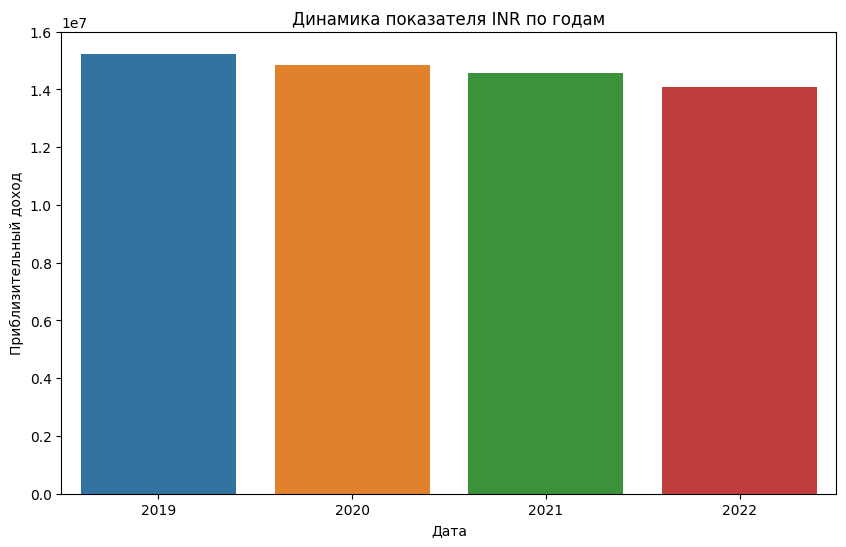

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Date_year', y='INR', data=df_date_year)
plt.xlabel('Дата')
plt.ylabel('Приблизительный доход')
plt.title('Динамика показателя INR по годам')
plt.xticks(rotation=0)
plt.show()

**Вывод: отрицательная динамика дохода в сравнение с предыдущим годом, БЕРЕМ ВО ВНИМАНИЕ.**


In [80]:
df_date['Quan'] = df['Quan']

In [81]:
df_date_year_Quan = df_date.groupby(['Date_year']).agg({'Quan':'sum'}).reset_index().sort_values(by='Quan', ascending=False)
df_date_year_Quan.head(5)

Date_year       Quan
1       2020  558973.06
0       2019  552693.55
2       2021  534675.60
3       2022  518980.53

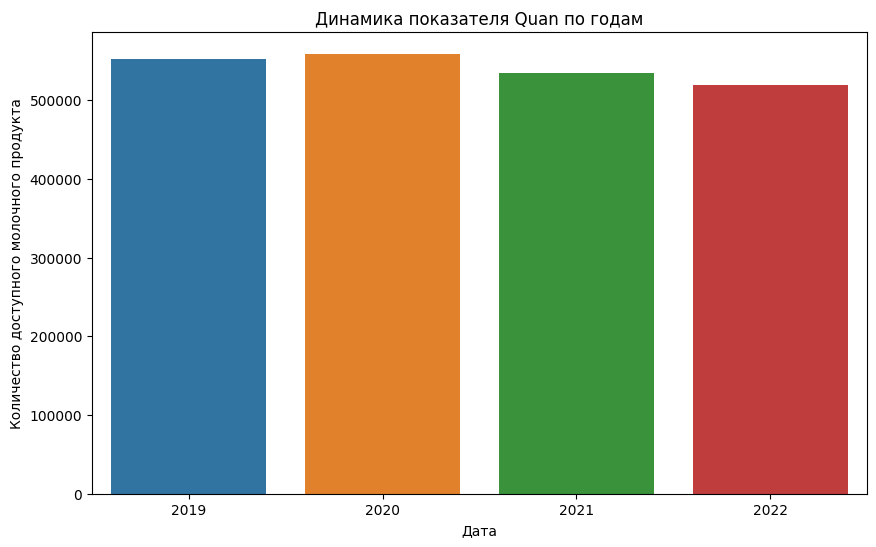

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Date_year', y='Quan', data=df_date_year_Quan)
plt.xlabel('Дата')
plt.ylabel('Количество доступного молочного продукта')
plt.title('Динамика показателя Quan по годам')
plt.xticks(rotation=0)
plt.show()

*Произвел группировку по месяцу для определения ежемесячного общего дохода в молочной промышленности*

In [84]:
years = df_date['Date_year'].unique()

In [85]:
years

array([2022, 2021, 2019, 2020])

In [86]:
for i, year in enumerate(years):
    year_data = df_date[df_date['Date_year'] == year]
    monthly_revenue = df_date.groupby(['Date_month']).agg({
        'INR': 'sum'
    }).reset_index()

In [87]:
monthly_revenue

Date_month         INR
0            1  5916404.03
1            2  5179927.29
2            3  4576579.54
3            4  4281564.87
4            5  4667433.64
5            6  5345065.14
6            7  4484022.08
7            8  4645179.28
8            9  5387457.44
9           10  4482561.18
10          11  4616695.36
11          12  5151758.01

*Ежемесячный общий доход в молочной промышленности*

In [88]:
df_monthly = df_date.copy(deep=True)

In [89]:

df_date_monthly = df_monthly['Date_year'].unique()

In [90]:
df_monthly_date = df_monthly.groupby('Date_month').agg({
    'INR': 'sum'
}).reset_index()

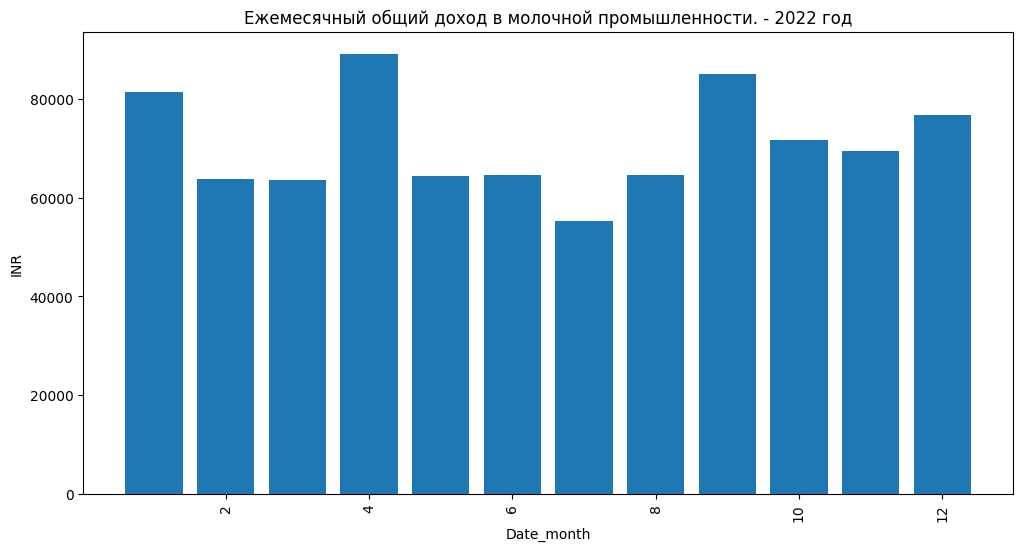

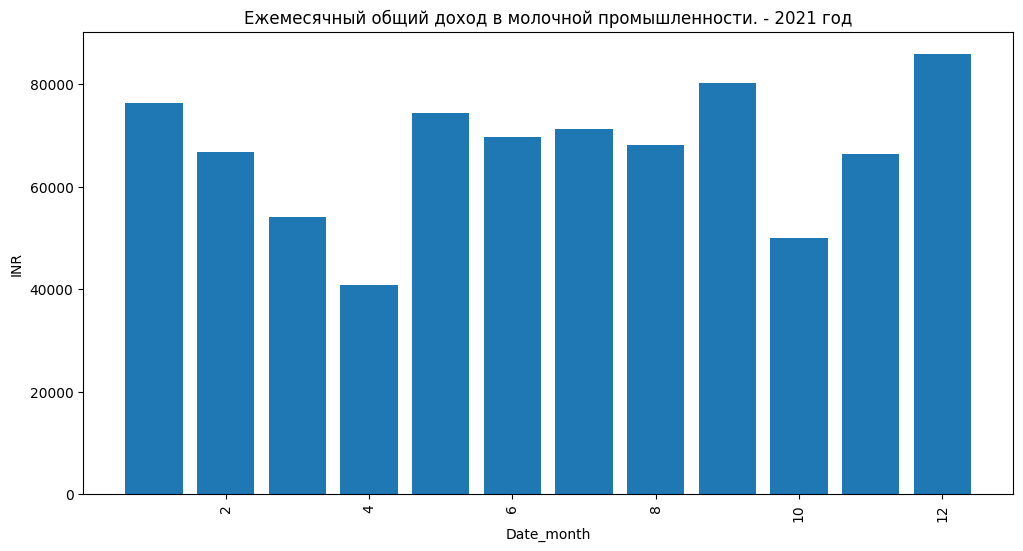

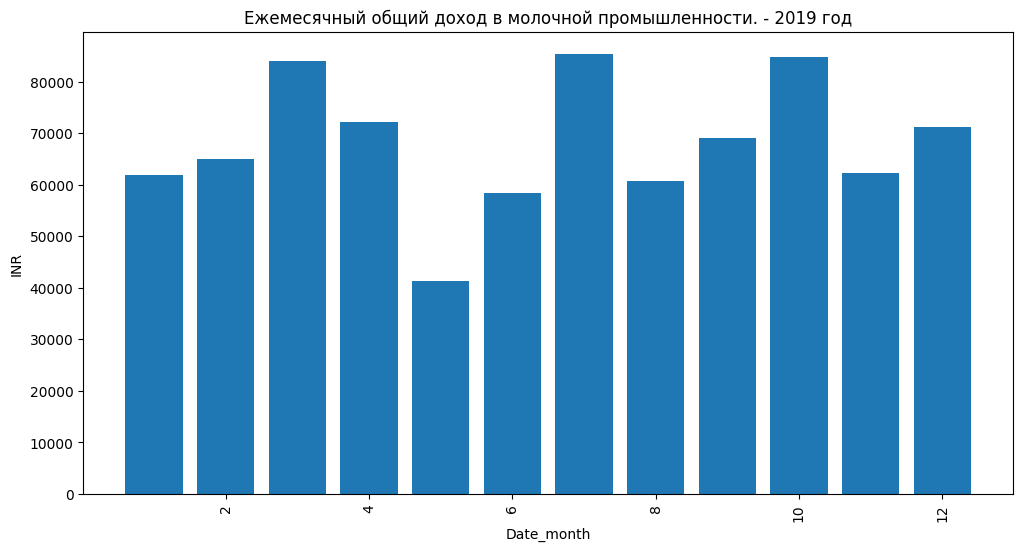

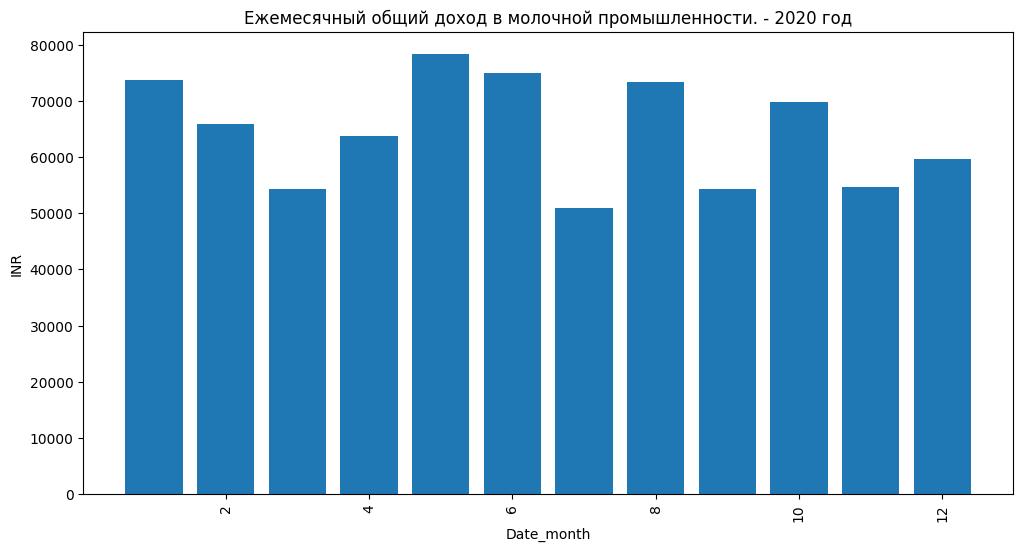

In [91]:
for date_monthly in df_date_monthly:
    plt.figure(figsize=(12, 6))
    df_dateMonthly = df_monthly[df_monthly['Date_year'] == date_monthly]
    x = df_dateMonthly['Date_month']
    plt.bar(x, df_dateMonthly['INR'])
    plt.xlabel('Date_month')
    plt.ylabel('INR')
    plt.title(f'Ежемесячный общий доход в молочной промышленности. - {date_monthly} год')
    plt.xticks(rotation=90)
    plt.show()

**Общий доход в 2022 году был более равномерным по сравнению с другими. Январь, апрель, сентябрь и декабрь — месяцы с многообещающими продажами. Июль показывает большинство изменений.**

In [92]:
df_date['Brand'] = df['Brand']

In [93]:
df_date.head(1)

Loc  Prod_Name  Tot_Value     INR       Date  Prod_Date   Exp_Date Date_name  Date_year  Date_month  Quan_Sold*Price_sold   Quan        Brand
0  Telangana  Ice Cream  19064.128  575.68 2022-02-17 2021-12-27 2022-01-21  Thursday       2022           2                575.68  222.4  Dodla Dairy

*Произвел группировку приблизительный общий доход по бренду и месяцу*

In [94]:
monthly_brand_total = df_date.groupby(['Date_month', 'Brand'])['INR'] \
                             .sum() \
                             .reset_index()

In [95]:
monthly_brand_total.head(5)

Date_month                 Brand         INR
0           1                  Amul  1401696.42
1           1  Britannia Industries   112323.98
2           1           Dodla Dairy   338783.30
3           1       Dynamix Dairies   135910.30
4           1          Mother Dairy  1219928.84

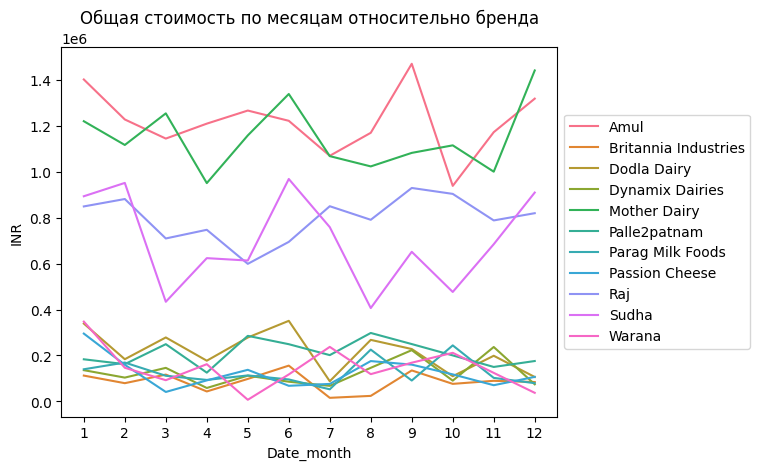

In [96]:
sns.lineplot(data=monthly_brand_total, x='Date_month', y='INR', hue='Brand')
plt.title('Общая стоимость по месяцам относительно бренда')
plt.xticks(range(1, 13))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Вывод: запомним Britannia Industries, на мой взгляд более менее стабильная динамика по общей доходности**

*Производим группировку, локация, общая площадь фермы, количество коров*

In [97]:
df_farm_performance = df.groupby(['Loc', 'Tot_Land_Area', 'Num_of_Cows']).agg({
    'Quan_Sold': 'sum',
    'INR': 'sum',
    'Price_per_Unit(sold)': 'mean'
}).reset_index()

In [98]:
df_farm_performance.head(1)

Loc  Tot_Land_Area  Num_of_Cows  Quan_Sold      INR  Price_per_Unit(sold)
0  Bihar          11.86           80        228  10807.2                  47.4

*Формируем диаграмму по производительности фермы с учетом количества коров*

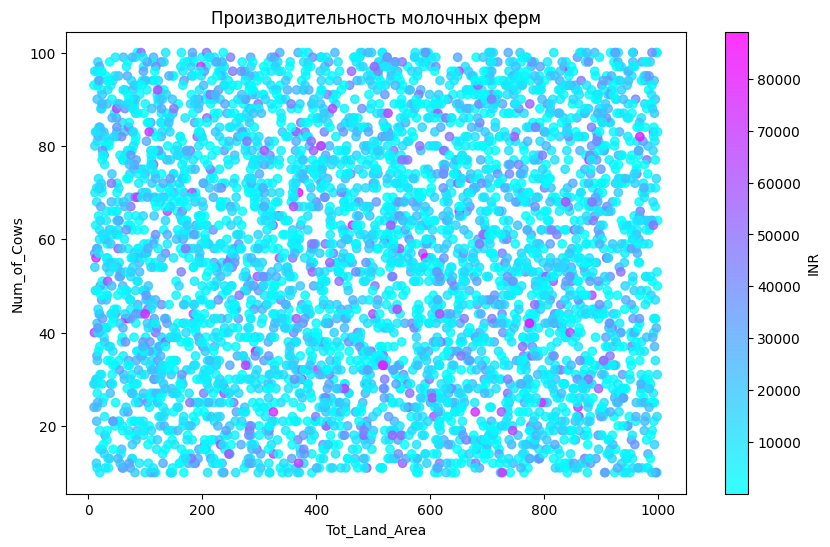

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(df_farm_performance['Tot_Land_Area'], df_farm_performance['Num_of_Cows'],
            c=df_farm_performance['INR'], cmap='cool', alpha=0.8)
plt.xlabel('Tot_Land_Area')
plt.ylabel('Num_of_Cows')
plt.title('Производительность молочных ферм')
plt.colorbar(label='INR')
plt.show()

**Вывод: на первый взгляд более производительней являются фермы Tot_Land_Area от 200 до 650, Num_of_Cows от 40 до 80, а также с более высокой доходностью**

***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

*Разбивка общей прибыли по годам и локации фермы*

In [100]:
df_date_INR = df_date.groupby(['Loc']).agg({'INR':'sum'}).sort_values(by='INR', ascending=False).reset_index()
df_date_INR.head(35)

Loc         INR
0       Chandigarh  7538982.35
1            Delhi  6952125.24
2    Uttar Pradesh  3705388.56
3      Maharashtra  3535381.94
4           Kerala  3485112.52
5       Tamil Nadu  3455957.32
6   Madhya Pradesh  3448986.54
7            Bihar  3446206.42
8        Rajasthan  3443553.56
9        Telangana  3367815.11
10     West Bengal  3350541.68
11       Jharkhand  3341338.74
12         Gujarat  3331222.75
13       Karnataka  3288575.76
14         Haryana  3043459.37

*Группируем по расположению фермы и проданному кол-ву молочного продукта * на медианное значение стоимости по которой был продан продукт*

In [101]:
df.groupby(['Loc']) \
    .agg({'Quan_Sold': 'sum', 'Price_per_Unit(sold)':'median'}) \
    .sort_values('Quan_Sold', ascending=False) \
    .reset_index() \
    .head(15)

Loc  Quan_Sold  Price_per_Unit(sold)
0       Chandigarh     134625                56.430
1            Delhi     130096                53.470
2        Rajasthan      67102                50.625
3      Maharashtra      66085                58.170
4   Madhya Pradesh      64531                52.630
5          Gujarat      64057                51.580
6    Uttar Pradesh      64015                56.660
7            Bihar      62395                53.420
8        Karnataka      62037                54.380
9        Telangana      61293                52.000
10      Tamil Nadu      61045                56.880
11          Kerala      60231                52.480
12         Haryana      59828                54.180
13       Jharkhand      57917                55.735
14     West Bengal      57754                56.060

*Анализируем упущенную выгоду, факт - ожидание, фактическая стоимость продукта - прайсовая стоимость продукта*

In [102]:
df_lost_profit = df_date.copy(deep=True)

In [103]:
df_lost_profit['Price_per_Unit(sold)'] = df['Price_per_Unit(sold)']
df_lost_profit['Price_per_Unit'] = df['Price_per_Unit']
df_lost_profit['Quan_Sold'] = df['Quan_Sold']

In [104]:
df_lost_profit.head(1)

Loc  Prod_Name  Tot_Value     INR       Date  Prod_Date   Exp_Date Date_name  Date_year  Date_month  Quan_Sold*Price_sold   Quan        Brand  Price_per_Unit(sold)  Price_per_Unit  Quan_Sold
0  Telangana  Ice Cream  19064.128  575.68 2022-02-17 2021-12-27 2022-01-21  Thursday       2022           2                575.68  222.4  Dodla Dairy                 82.24           85.72          7

In [105]:
df_lost_profit_Price = df_lost_profit.groupby(['Date_year', 'Prod_Name']) \
                .agg({'Quan_Sold':'sum', 'Price_per_Unit':'median', 'Price_per_Unit(sold)':'median', 'INR':'sum'}) \
                .sort_values('Prod_Name', ascending=False) \
                .reset_index()

In [106]:
df_lost_profit_Price.head(10)

Date_year Prod_Name  Quan_Sold  Price_per_Unit  Price_per_Unit(sold)         INR
0       2022    Yogurt      21339          48.290                47.920  1088835.02
1       2021    Yogurt      31688          47.230                49.570  1762278.09
2       2020    Yogurt      29099          54.320                55.410  1618455.48
3       2019    Yogurt      22618          54.580                53.940  1125491.30
4       2019    Paneer      29445          49.870                48.740  1531651.46
5       2021    Paneer      25465          61.025                62.220  1444556.74
6       2022    Paneer      25143          52.240                52.520  1410407.94
7       2020    Paneer      27878          54.750                53.140  1575978.77
8       2019      Milk      26253          55.100                57.475  1535853.36
9       2020      Milk      32568          47.910                46.680  1638592.48

In [107]:
df_lost_profit_Price['Price_per_Unit(sold)*Quan_Sold'] = df_lost_profit_Price['Price_per_Unit(sold)'] * df_lost_profit_Price['Quan_Sold']

In [108]:
df_lost_profit_Price.head(10)

Date_year Prod_Name  Quan_Sold  Price_per_Unit  Price_per_Unit(sold)         INR  Price_per_Unit(sold)*Quan_Sold
0       2022    Yogurt      21339          48.290                47.920  1088835.02                     1022564.880
1       2021    Yogurt      31688          47.230                49.570  1762278.09                     1570774.160
2       2020    Yogurt      29099          54.320                55.410  1618455.48                     1612375.590
3       2019    Yogurt      22618          54.580                53.940  1125491.30                     1220014.920
4       2019    Paneer      29445          49.870                48.740  1531651.46                     1435149.300
5       2021    Paneer      25465          61.025                62.220  1444556.74                     1584432.300
6       2022    Paneer      25143          52.240                52.520  1410407.94                     1320510.360
7       2020    Paneer      27878          54.750                53.140  1575978.77                     1481436.920
8       2019      Milk      26253          55.100                57.475  1535853.36                     1508891.175
9       2020      Milk      32568          47.910                46.680  1638592.48                     1520274.240

In [109]:
df_lost_profit_Price['lost_profit_INR'] = df_lost_profit_Price['Price_per_Unit(sold)*Quan_Sold'] - df_lost_profit_Price['INR']

In [110]:
df_lost_profit_Price.head(5)

Date_year Prod_Name  Quan_Sold  Price_per_Unit  Price_per_Unit(sold)         INR  Price_per_Unit(sold)*Quan_Sold  lost_profit_INR
0       2022    Yogurt      21339           48.29                 47.92  1088835.02                      1022564.88        -66270.14
1       2021    Yogurt      31688           47.23                 49.57  1762278.09                      1570774.16       -191503.93
2       2020    Yogurt      29099           54.32                 55.41  1618455.48                      1612375.59         -6079.89
3       2019    Yogurt      22618           54.58                 53.94  1125491.30                      1220014.92         94523.62
4       2019    Paneer      29445           49.87                 48.74  1531651.46                      1435149.30        -96502.16

*Возьмём показатель "INR" за ожидания (приблизительный) общий доход, построим гистограмму относительно ожидания и параметра (проданное кол-во продукта * на фактическую стоимость, по которой продали продукт), сравним два показателя*

In [111]:
df_Price_INR = df_lost_profit_Price['Date_year'].unique()

In [112]:
df_Price_INR

array([2022, 2021, 2020, 2019])

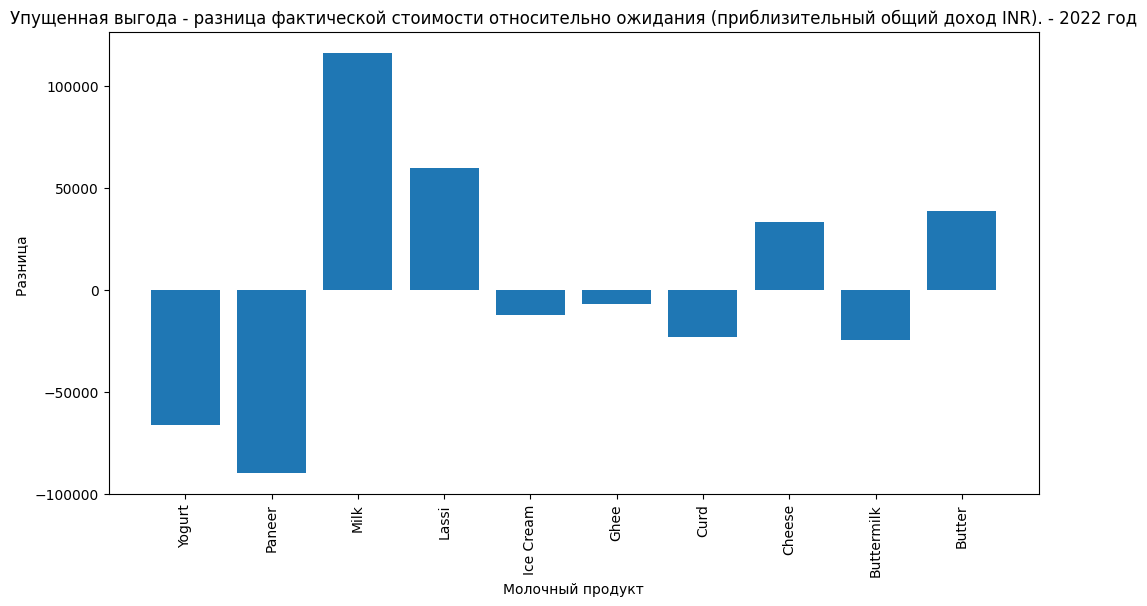

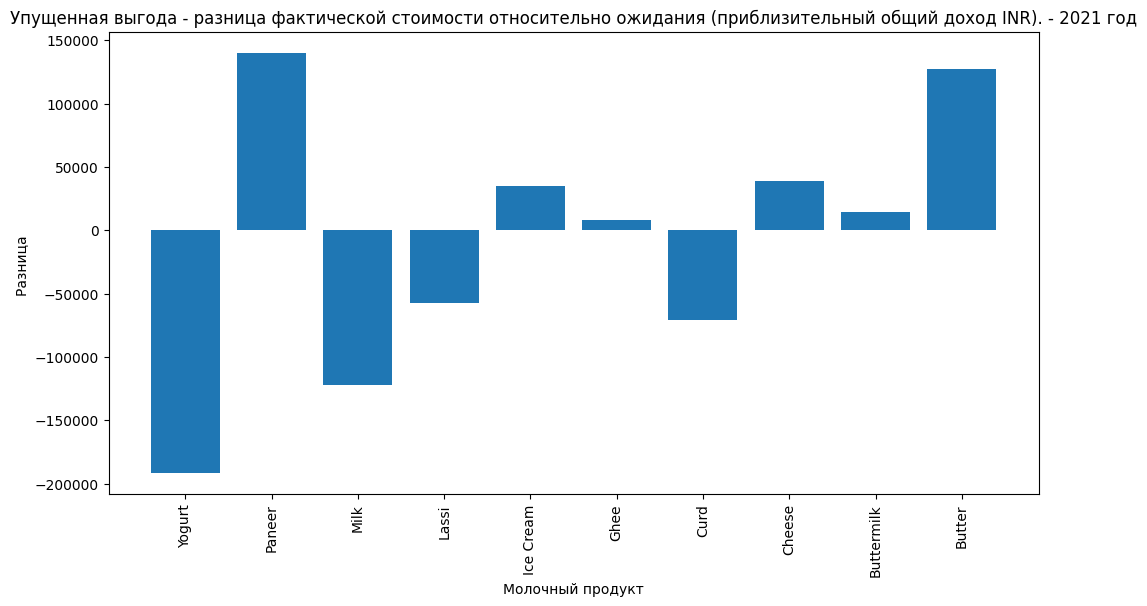

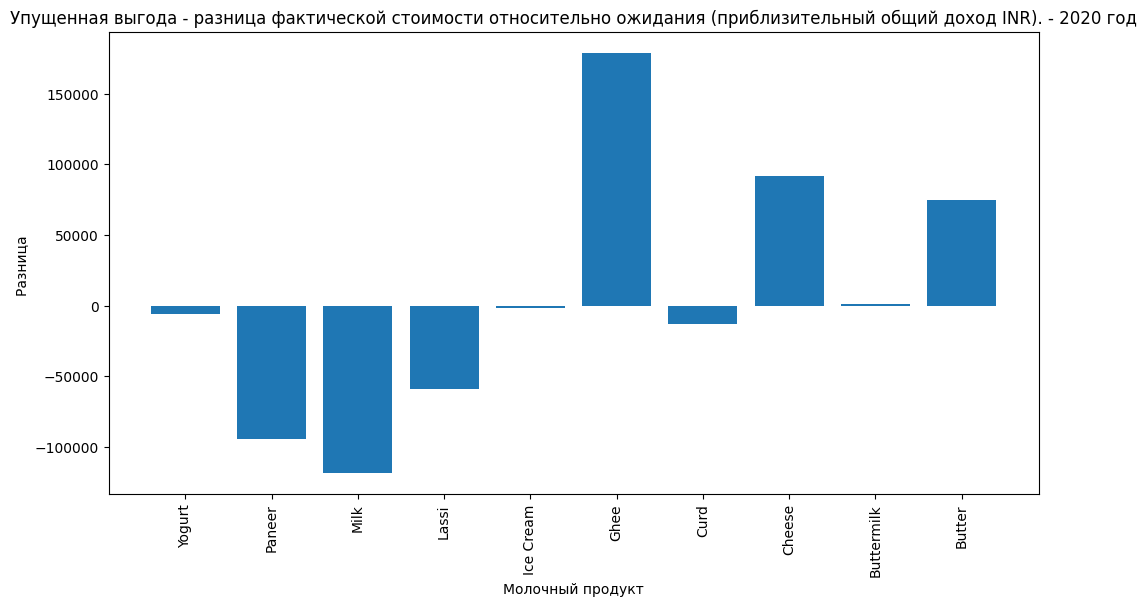

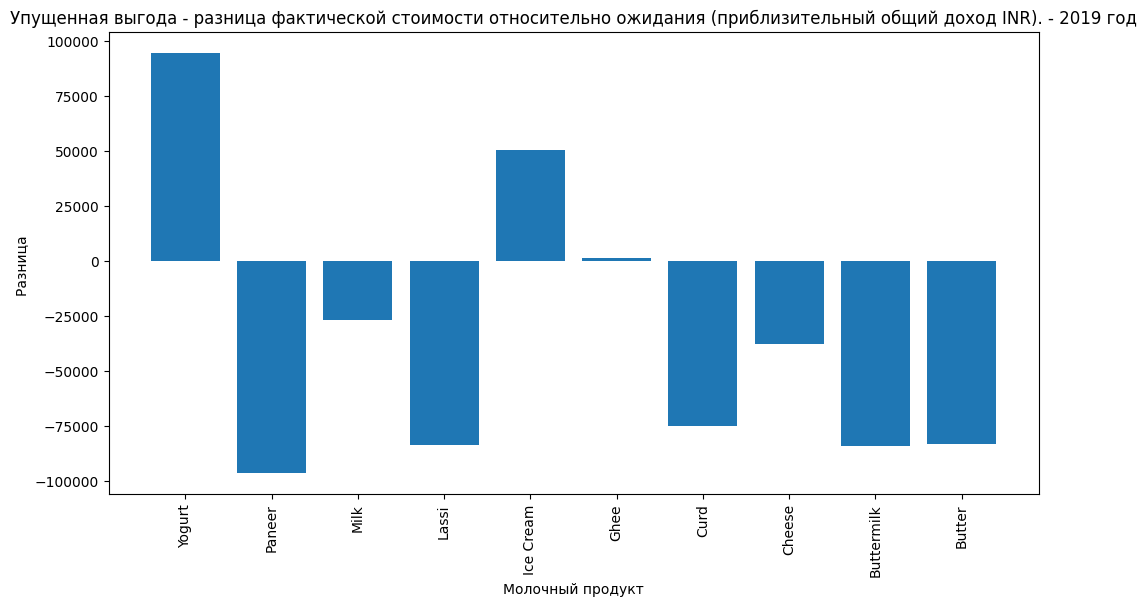

In [113]:
for date_Price in df_Price_INR:
    plt.figure(figsize=(12, 6))
    df_Price_INR_lost = df_lost_profit_Price[df_lost_profit_Price['Date_year'] == date_Price]
    x = df_Price_INR_lost['Prod_Name']
    plt.bar(x, df_Price_INR_lost[ 'lost_profit_INR'])
    plt.xlabel('Молочный продукт')
    plt.ylabel('Разница ')
    plt.title(f'Упущенная выгода - разница фактической стоимости относительно ожидания (приблизительный общий доход INR). - {date_Price} год')
    plt.xticks(rotation=90)
    plt.show()

**Вывод: мы имеем прайсовую стоимость продукта, я сгруппировал данные по кол-ву проданного продукта, по какой стоимости был продан продукт, сравнил с установленным прайсом на данный продукт.**

**Произвел расчёт упущенной выгоды и наобор, позиции где продавали дороже чем прайс. Если продажи выше прайса были стабильные, имеет смысл поднять стоимость в прайсе, взять за базовый уровень.**
**Тем самым возможно будет скорректировать КПЭ у отдела продаж, мотивировать для улучшения данного показателя.**

*Рассмотрим упущенную выгоду относительно прайсовой стоимости и фактической стоимости продажи продукта*

In [114]:
df_lost_profit_Price['Price_per_Unit*Quan_Sold'] = df_lost_profit_Price['Price_per_Unit'] * df_lost_profit_Price['Quan_Sold']

In [115]:
df_lost_profit_Price['lost_profit_Price'] = df_lost_profit_Price['Price_per_Unit(sold)*Quan_Sold'] - df_lost_profit_Price['Price_per_Unit*Quan_Sold']

In [116]:
df_lost_profit_Price.head(5)

Date_year Prod_Name  Quan_Sold  Price_per_Unit  Price_per_Unit(sold)         INR  Price_per_Unit(sold)*Quan_Sold  lost_profit_INR  Price_per_Unit*Quan_Sold  lost_profit_Price
0       2022    Yogurt      21339           48.29                 47.92  1088835.02                      1022564.88        -66270.14                1030460.31           -7895.43
1       2021    Yogurt      31688           47.23                 49.57  1762278.09                      1570774.16       -191503.93                1496624.24           74149.92
2       2020    Yogurt      29099           54.32                 55.41  1618455.48                      1612375.59         -6079.89                1580657.68           31717.91
3       2019    Yogurt      22618           54.58                 53.94  1125491.30                      1220014.92         94523.62                1234490.44          -14475.52
4       2019    Paneer      29445           49.87                 48.74  1531651.46                      1435149.30        -96502.16                1468422.15          -33272.85

*Построим гистограмму*

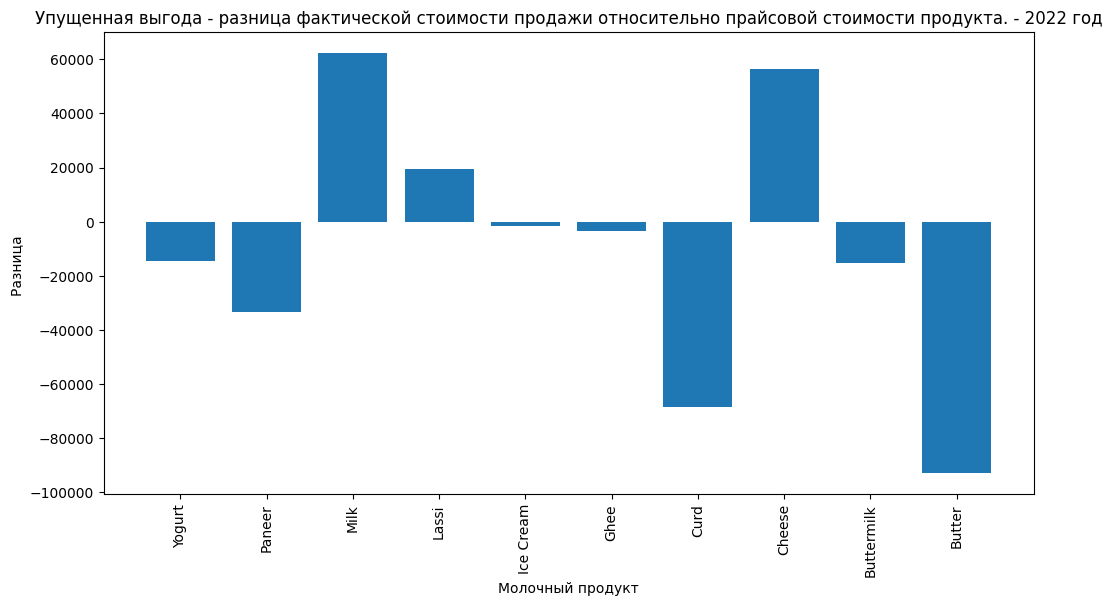

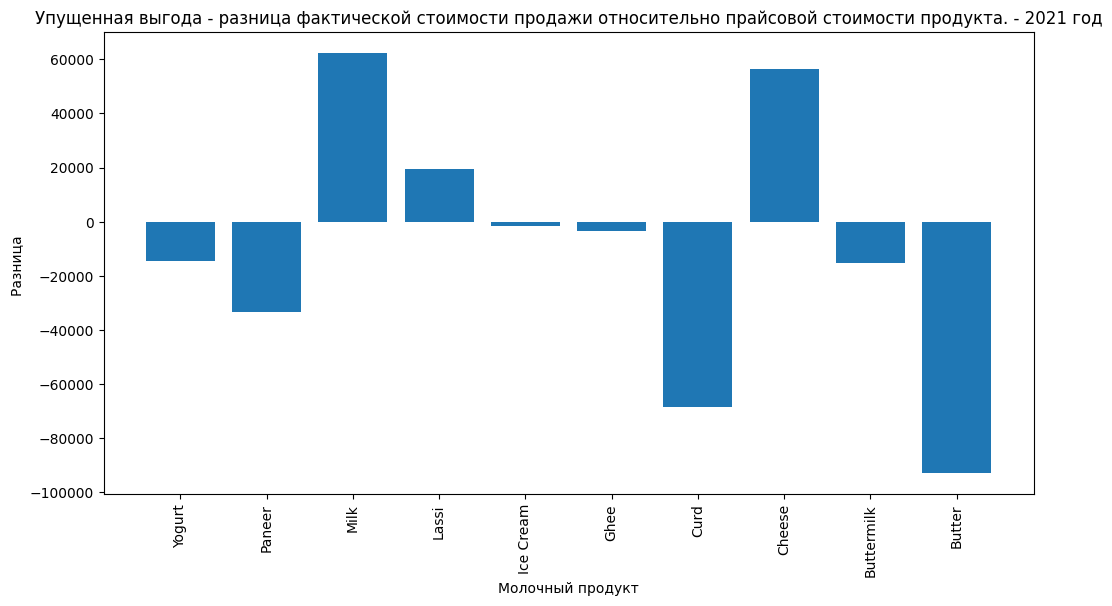

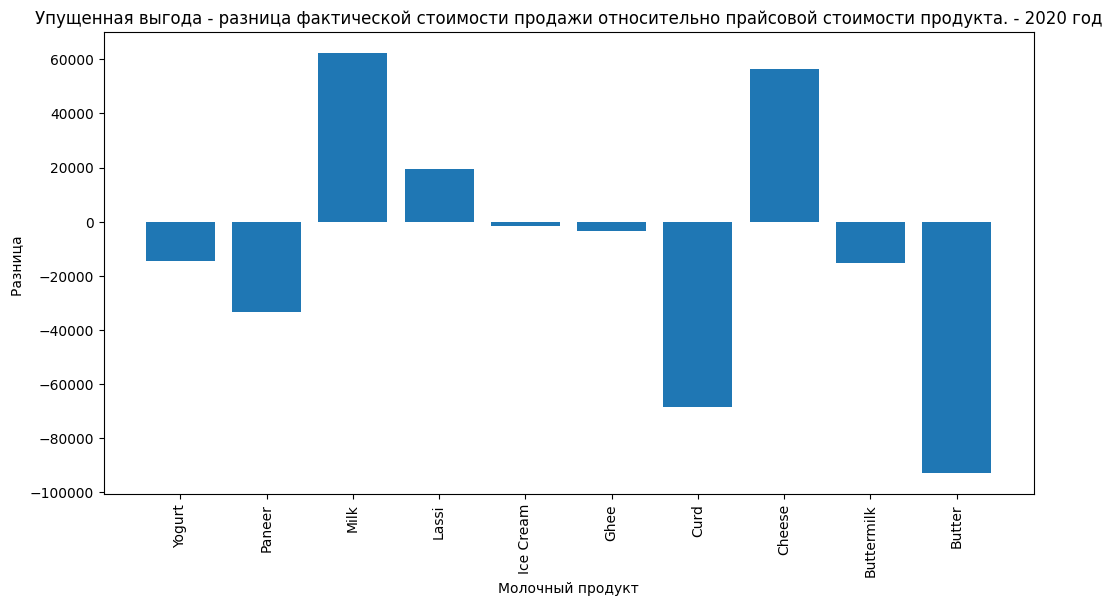

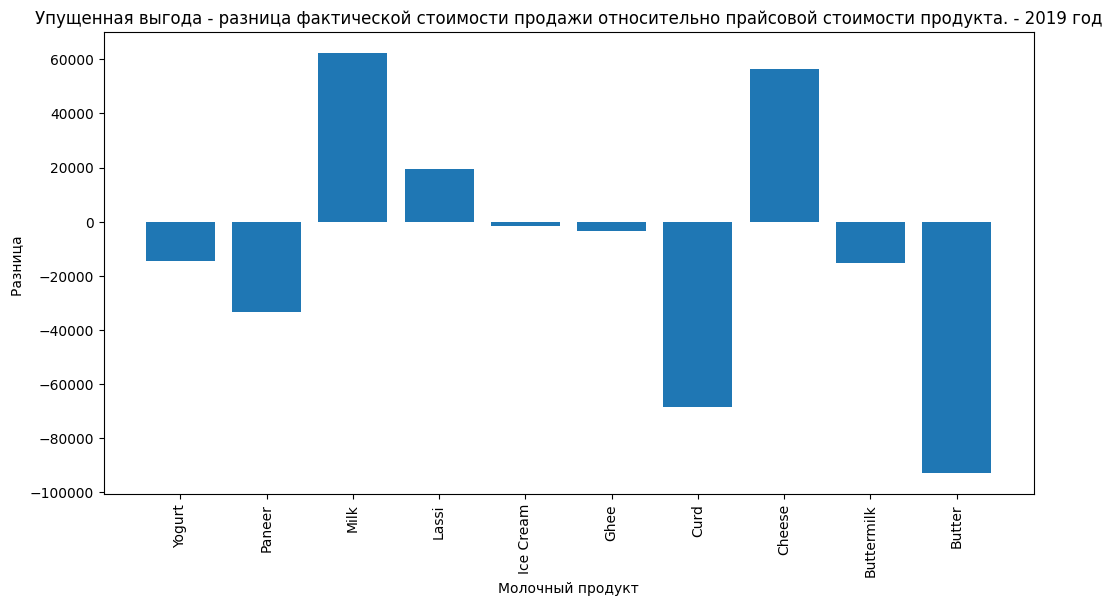

In [117]:
for date_Price_lost in df_Price_INR:
    plt.figure(figsize=(12, 6))
    df_Price_lost = df_lost_profit_Price[df_lost_profit_Price['Date_year'] == date_Price]
    x = df_Price_lost['Prod_Name']
    plt.bar(x, df_Price_lost[ 'lost_profit_Price'])
    plt.xlabel('Молочный продукт')
    plt.ylabel('Разница ')
    plt.title(f'Упущенная выгода - разница фактической стоимости продажи относительно прайсовой стоимости продукта. - {date_Price_lost} год')
    plt.xticks(rotation=90)
    plt.show()

***Вывод: необходимо пересмотреть модель продаж, проводить анализ, выявлять причину, почему в некоторой группе продуктов, требуется постоянно давать скидки, а по остальной части продавать дороже. По итогу, картина компенсируется, потери выравниваются и итоговые показатели равны. Перспективы на развитие имеются как со стороны производства, прайсовой стоимости, так и со стороны отдела продаж. В первую очередь, я рекомендую сделать акцент на корректировку модели продаж***

*Продолжаем: выводим список (значений) реквизитов*

In [118]:
df.columns.tolist()

['Loc',
 'Tot_Land_Area',
 'Num_of_Cows',
 'Farm_Size',
 'Date',
 'Prod_ID',
 'Prod_Name',
 'Brand',
 'Quan',
 'Price_per_Unit',
 'Tot_Value',
 'Shelf_Life',
 'Storage_Con',
 'Prod_Date',
 'Exp_Date',
 'Quan_Sold',
 'Price_per_Unit(sold)',
 'INR',
 'Cust_Loc',
 'Sales_Channel',
 'Quan_in_Stock',
 'Min_Stock_Threshold',
 'Reo_Quan']

***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.


*Выводим аналитические показатели из dataframe df по столбцам count, mean, std, min, 25%, 50%, 75%, max*

In [119]:
df.sample(5)

Loc  Tot_Land_Area  Num_of_Cows Farm_Size       Date  Prod_ID  Prod_Name         Brand    Quan  Price_per_Unit   Tot_Value  Shelf_Life   Storage_Con  Prod_Date   Exp_Date  Quan_Sold  Price_per_Unit(sold)       INR    Cust_Loc Sales_Channel  Quan_in_Stock  Min_Stock_Threshold  Reo_Quan
1544  Chandigarh         449.46           55    Medium 2021-09-20        5  Ice Cream   Dodla Dairy  736.78           61.79  45525.6362          24        Frozen 2021-09-16 2021-10-10        243                 64.75  15734.25  Tamil Nadu     Wholesale            493                13.85    166.37
3532  Tamil Nadu         530.09           78    Medium 2022-04-22       10       Ghee         Sudha   30.63           97.01   2971.4163          90       Ambient 2022-03-23 2022-06-21         12                 92.08   1104.96      Kerala     Wholesale             18                14.92    144.29
2572       Delhi         139.09           66     Large 2022-08-17        1       Milk  Mother Dairy  791.33           95.75  75769.8475          21    Tetra Pack 2022-07-15 2022-08-05        691                 93.58  64663.78   Karnataka        Retail            100                70.67     93.33
451   Chandigarh         121.19           36     Small 2020-08-25       10       Ghee          Amul  752.61           18.45  13885.6545          86       Ambient 2020-07-27 2020-10-21        405                 13.82   5597.10       Delhi        Online            347                59.94    137.36
2938     Gujarat         317.94           10     Large 2022-11-05        9     Paneer           Raj  131.96           96.93  12790.8828          11  Refrigerated 2022-11-04 2022-11-15         68                 93.23   6339.64       Delhi        Online             63                33.04     57.64

In [120]:
df.describe()

Tot_Land_Area  Num_of_Cows                           Date      Prod_ID         Quan  Price_per_Unit     Tot_Value   Shelf_Life                      Prod_Date                       Exp_Date    Quan_Sold  Price_per_Unit(sold)           INR  Quan_in_Stock  Min_Stock_Threshold     Reo_Quan
count    4325.000000  4325.000000                           4325  4325.000000  4325.000000     4325.000000   4325.000000  4325.000000                           4325                           4325  4325.000000            4325.00000   4325.000000    4325.000000          4325.000000  4325.000000
mean      503.483073    54.963699  2020-12-15 22:59:04.231213824     5.509595   500.652657       54.785938  27357.845411    29.127630  2020-11-15 08:53:22.959537664  2020-12-14 11:57:10.196531968   248.095029              54.77914  13580.265401     252.068671            55.826143   109.107820
min        10.170000    10.000000            2019-01-01 00:00:00     1.000000     1.170000       10.030000     42.516500     1.000000            2018-11-02 00:00:00            2018-11-14 00:00:00     1.000000               5.21000     12.540000       0.000000            10.020000    20.020000
25%       252.950000    32.000000            2019-12-20 00:00:00     3.000000   254.170000       32.460000   9946.814500    10.000000            2019-11-23 00:00:00            2019-12-20 00:00:00    69.000000              32.64000   2916.650000      66.000000            32.910000    64.280000
50%       509.170000    55.000000            2020-12-02 00:00:00     6.000000   497.550000       54.400000  21869.652900    22.000000            2020-10-29 00:00:00            2020-11-29 00:00:00   189.000000              54.14000   8394.540000     191.000000            56.460000   108.340000
75%       751.250000    77.000000            2021-12-15 00:00:00     8.000000   749.780000       77.460000  40954.441000    30.000000            2021-11-16 00:00:00            2021-12-13 00:00:00   374.000000              77.46000  19504.550000     387.000000            79.010000   153.390000
max       999.530000   100.000000            2022-12-28 00:00:00    10.000000   999.930000       99.990000  99036.369600   150.000000            2022-12-22 00:00:00            2023-05-17 00:00:00   960.000000             104.51000  89108.900000     976.000000            99.990000   199.950000
std       285.935061    26.111487                            NaN     2.842979   288.975915       26.002815  21621.051594    30.272114                            NaN                            NaN   217.024182              26.19279  14617.009122     223.620870            26.301450    51.501035

*Выводим аналитические показатели по строкам*

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Loc                   4325 non-null   object        
 1   Tot_Land_Area         4325 non-null   float64       
 2   Num_of_Cows           4325 non-null   int64         
 3   Farm_Size             4325 non-null   object        
 4   Date                  4325 non-null   datetime64[ns]
 5   Prod_ID               4325 non-null   int64         
 6   Prod_Name             4325 non-null   object        
 7   Brand                 4325 non-null   object        
 8   Quan                  4325 non-null   float64       
 9   Price_per_Unit        4325 non-null   float64       
 10  Tot_Value             4325 non-null   float64       
 11  Shelf_Life            4325 non-null   int64         
 12  Storage_Con           4325 non-null   object        
 13  Prod_Date         

In [122]:
df.describe(include=['object'])

Loc Farm_Size Prod_Name Brand   Storage_Con Cust_Loc Sales_Channel
count    4325      4325      4325  4325          4325     4325          4325
unique     15         3        10    11             5       15             3
top     Delhi     Large      Curd  Amul  Refrigerated    Delhi        Retail
freq      525      1462       479  1053          2459      499          1478

In [123]:
df.describe(include=['float'])

Tot_Land_Area         Quan  Price_per_Unit     Tot_Value  Price_per_Unit(sold)           INR  Min_Stock_Threshold     Reo_Quan
count    4325.000000  4325.000000     4325.000000   4325.000000            4325.00000   4325.000000          4325.000000  4325.000000
mean      503.483073   500.652657       54.785938  27357.845411              54.77914  13580.265401            55.826143   109.107820
std       285.935061   288.975915       26.002815  21621.051594              26.19279  14617.009122            26.301450    51.501035
min        10.170000     1.170000       10.030000     42.516500               5.21000     12.540000            10.020000    20.020000
25%       252.950000   254.170000       32.460000   9946.814500              32.64000   2916.650000            32.910000    64.280000
50%       509.170000   497.550000       54.400000  21869.652900              54.14000   8394.540000            56.460000   108.340000
75%       751.250000   749.780000       77.460000  40954.441000              77.46000  19504.550000            79.010000   153.390000
max       999.530000   999.930000       99.990000  99036.369600             104.51000  89108.900000            99.990000   199.950000

In [124]:
df.describe(include=['int64'])

Num_of_Cows      Prod_ID   Shelf_Life    Quan_Sold  Quan_in_Stock
count  4325.000000  4325.000000  4325.000000  4325.000000    4325.000000
mean     54.963699     5.509595    29.127630   248.095029     252.068671
std      26.111487     2.842979    30.272114   217.024182     223.620870
min      10.000000     1.000000     1.000000     1.000000       0.000000
25%      32.000000     3.000000    10.000000    69.000000      66.000000
50%      55.000000     6.000000    22.000000   189.000000     191.000000
75%      77.000000     8.000000    30.000000   374.000000     387.000000
max     100.000000    10.000000   150.000000   960.000000     976.000000

*В первую очередь обращаю внимание на последние два столбца, 'Quan_Sold' и 'Quan_in_Stock', показатели по остатку на складе очень завышены, остатки на складе необходимо рассматривать в более короткие промежуки времени (периоды), допустим в разрез одного месяца, сколько было произведено, какой остаток на складе. Если делать анализ по складским остаткам в период один год, как вариант, рассмотреть только последний месяц текущего года. Сформируем датасет и сделаем соответвующую группировку и построим диаграмму.*

In [125]:
df_date_stock = df_date.copy(deep=True)
df_date_stock['Quan_in_Stock'] = df['Quan_in_Stock']
df_date_stock['Quan_Sold'] = df['Quan_Sold']
df_date_stock['Price_per_Unit(sold)'] = df['Price_per_Unit(sold)']
df_date_stock.head(1)

Loc  Prod_Name  Tot_Value     INR       Date  Prod_Date   Exp_Date Date_name  Date_year  Date_month  Quan_Sold*Price_sold   Quan        Brand  Quan_in_Stock  Quan_Sold  Price_per_Unit(sold)
0  Telangana  Ice Cream  19064.128  575.68 2022-02-17 2021-12-27 2022-01-21  Thursday       2022           2                575.68  222.4  Dodla Dairy            215          7                 82.24

In [126]:
df_date_stock = df_date_stock[df_date_stock['Date_month'] == 12]
df_date_stock.head(1)

Loc Prod_Name   Tot_Value       INR       Date  Prod_Date   Exp_Date  Date_name  Date_year  Date_month  Quan_Sold*Price_sold    Quan Brand  Quan_in_Stock  Quan_Sold  Price_per_Unit(sold)
1  Uttar Pradesh      Milk  29293.5228  21895.92 2021-12-01 2021-10-03 2021-10-25  Wednesday       2021          12              21895.92  687.48  Amul            129        558                 39.24

In [127]:
df_date_stock = df_date_stock.groupby(['Date_year', 'Loc', 'Prod_Name', 'Brand']).agg({'Quan_Sold':'sum', 'Quan_in_Stock':'sum', 'Price_per_Unit(sold)':'median'}).reset_index()
df_date_stock.head(5)

Date_year    Loc Prod_Name         Brand  Quan_Sold  Quan_in_Stock  Price_per_Unit(sold)
0       2019  Bihar    Butter          Amul        289            297                 29.76
1       2019  Bihar     Lassi          Amul        125             13                 70.85
2       2019  Bihar     Lassi  Mother Dairy        377            290                 15.81
3       2019  Bihar      Milk  Mother Dairy         11             68                 48.15
4       2019  Bihar    Paneer           Raj        723             74                 98.27

In [128]:
df_date_stock['Quan_in_Stock*Price_per_Unit'] = df_date_stock['Quan_in_Stock'] * df_date_stock['Price_per_Unit(sold)']
df_date_stock.head(5)

Date_year    Loc Prod_Name         Brand  Quan_Sold  Quan_in_Stock  Price_per_Unit(sold)  Quan_in_Stock*Price_per_Unit
0       2019  Bihar    Butter          Amul        289            297                 29.76                       8838.72
1       2019  Bihar     Lassi          Amul        125             13                 70.85                        921.05
2       2019  Bihar     Lassi  Mother Dairy        377            290                 15.81                       4584.90
3       2019  Bihar      Milk  Mother Dairy         11             68                 48.15                       3274.20
4       2019  Bihar    Paneer           Raj        723             74                 98.27                       7271.98

In [129]:
df_date_stock_tot = df_date_stock.groupby(['Date_year', 'Loc', 'Prod_Name', 'Brand']).agg({'Quan_in_Stock*Price_per_Unit':'sum'}).reset_index()
df_date_stock_tot.head(1)

Date_year    Loc Prod_Name Brand  Quan_in_Stock*Price_per_Unit
0       2019  Bihar    Butter  Amul                       8838.72

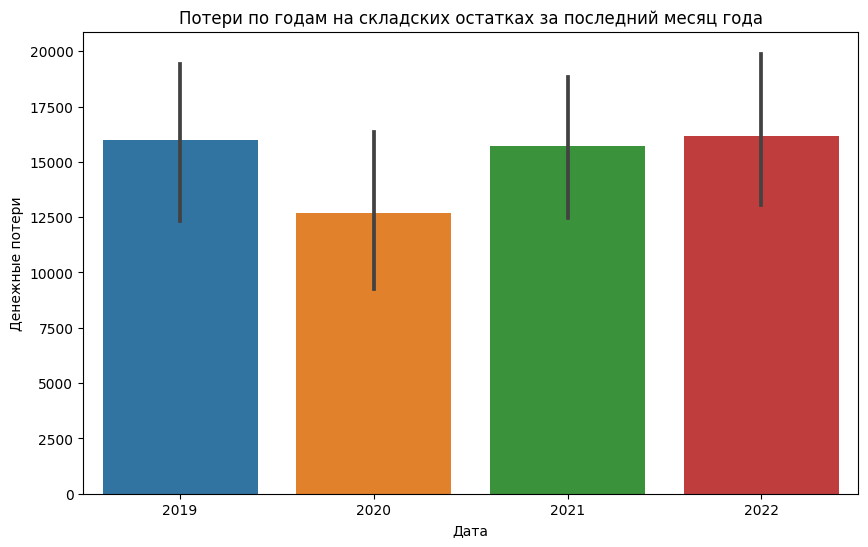

In [130]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Date_year', y='Quan_in_Stock*Price_per_Unit', data=df_date_stock_tot)
plt.xlabel('Дата')
plt.ylabel('Денежные потери')
plt.title('Потери по годам на складских остатках за последний месяц года')
plt.xticks(rotation=0)
plt.show()

**Вывод: из barplot видно, что самые большие потери из-за остатков складских, были в 2022. В принципе каждый год имеет большие потери по факту окончания года. Необъодимо сделать обследование производства, организовать операционную трансформацию на производстве. Запусть проект по стратегическому планированию и разработать прогнозную модель продаж**

In [131]:
df_date_Sold_Stock = df_date_stock['Date_year'].unique()

In [132]:
df_date_Sold_Stock

array([2019, 2020, 2021, 2022])

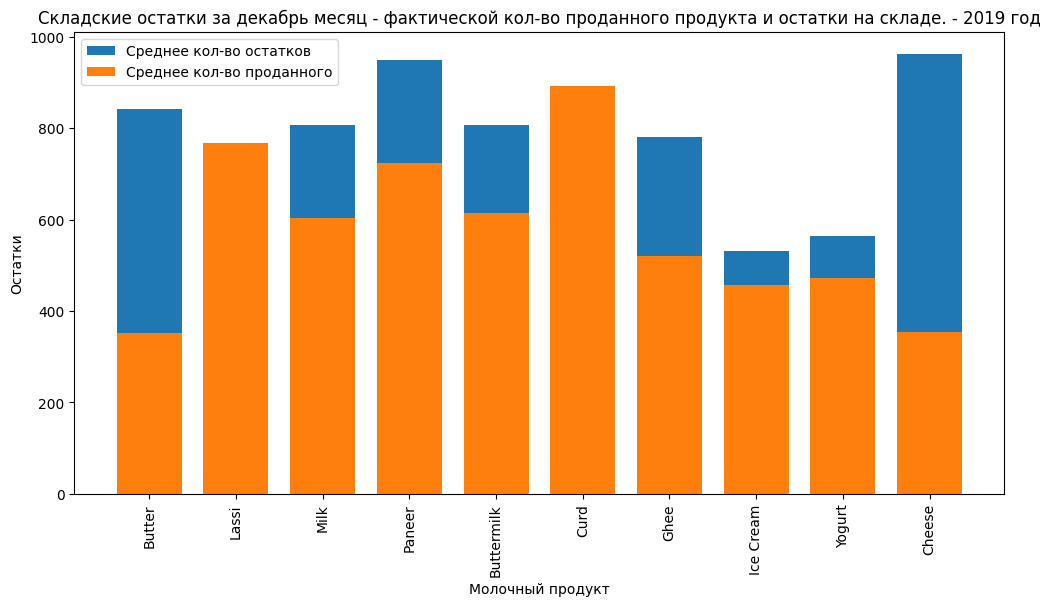

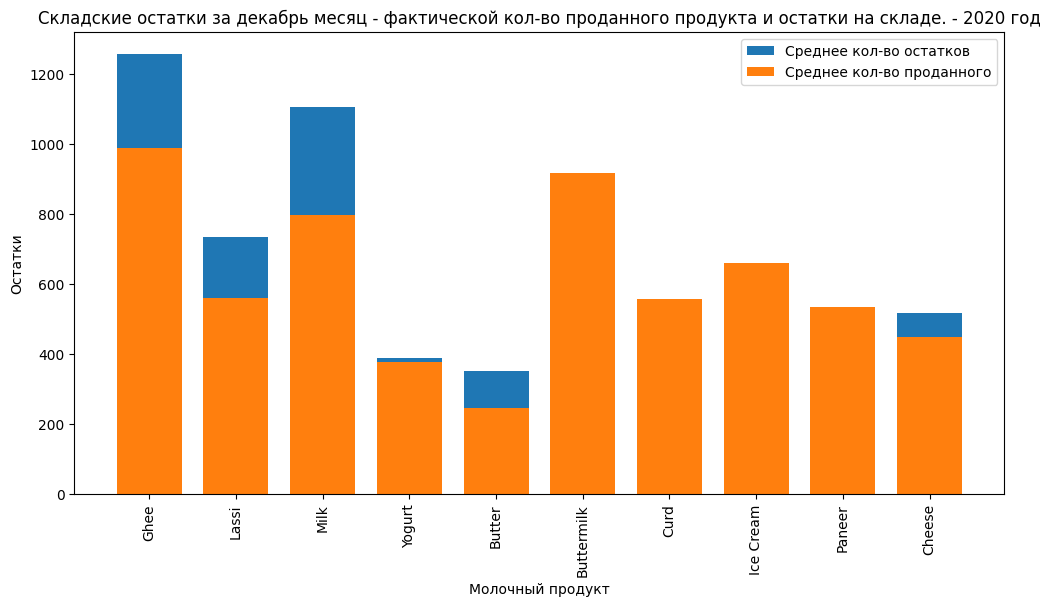

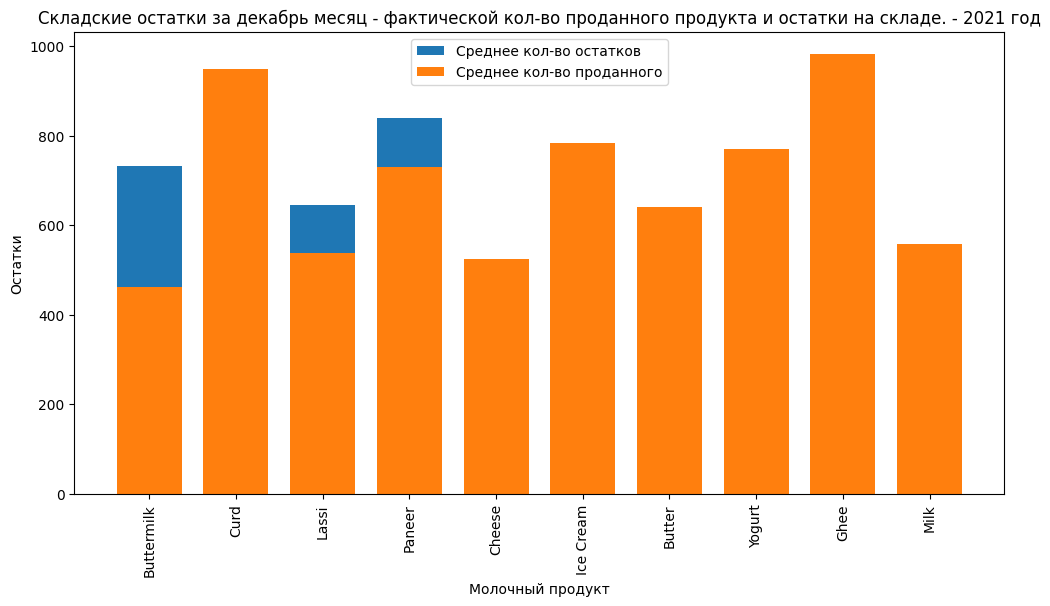

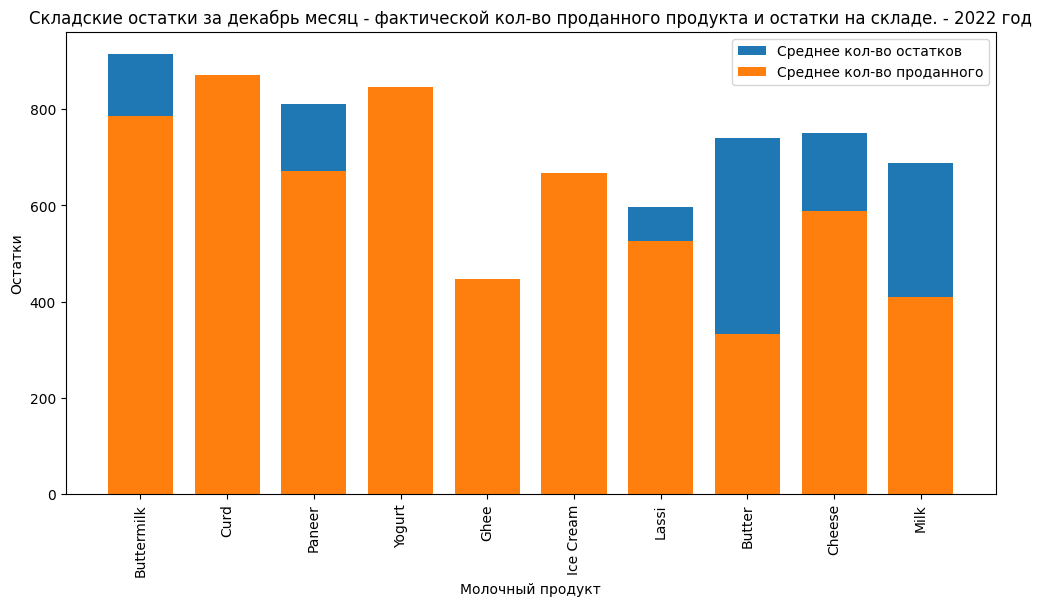

In [133]:
for date_Sold_Stock in df_date_Sold_Stock:
    plt.figure(figsize=(12, 6))
    width = 0.75
    df_dateSoldStock = df_date_stock[df_date_stock['Date_year'] == date_Sold_Stock]
    x = df_dateSoldStock['Prod_Name']
    plt.bar(x, df_dateSoldStock[ 'Quan_in_Stock' ],  width, label='Среднее кол-во остатков')
    plt.bar(x, df_dateSoldStock[ 'Quan_Sold'], width, label='Среднее кол-во проданного')
    plt.xlabel('Молочный продукт')
    plt.ylabel('Остатки')
    plt.title(f'Складские остатки за декабрь месяц - фактической кол-во проданного продукта и остатки на складе. - {date_Sold_Stock} год')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()



**Вывод: из данных диаграмм видно, что выше сказанное необходимо принять во внимание и незамедлительно начать процесс анализа и устранения потерь, большой показатель фактических остатков на складе**
**Для данного типа продукции, с минимальным сроком годности и небольшое время производства, складские остатки должны быть минимальные, близкие к нулю, производство - отгрузка - продажа**

***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

*Рассмотрим распределение бренда и типов молочных продуктов, а также их зависимость*

*Проверяем частоту встречаемости локации*

In [137]:
df['Loc'].value_counts(normalize=True, dropna=False)

Loc
Delhi             0.121387
Chandigarh        0.120000
Uttar Pradesh     0.063815
Gujarat           0.061734
Karnataka         0.060347
Madhya Pradesh    0.059884
Rajasthan         0.059191
Maharashtra       0.058960
Haryana           0.058497
Kerala            0.057572
Telangana         0.057341
Jharkhand         0.057341
Bihar             0.056647
West Bengal       0.055723
Tamil Nadu        0.051561
Name: proportion, dtype: float64

**Вывод: самые востребованные фермы Delhi и Chandigarh, так как за период 2019, 2020, 2021, 2022, чаще всего молочная продукция поступала именно с этой локации**

In [136]:
df['Brand'].value_counts()

Brand
Amul                    1053
Mother Dairy            1010
Raj                      685
Sudha                    648
Dodla Dairy              222
Palle2patnam             211
Dynamix Dairies          106
Warana                   104
Parag Milk Foods         102
Passion Cheese            96
Britannia Industries      88
Name: count, dtype: int64

*Проверяем частоту встречаемости бренда*

In [138]:
df['Brand'].value_counts(normalize=True, dropna=False)

Brand
Amul                    0.243468
Mother Dairy            0.233526
Raj                     0.158382
Sudha                   0.149827
Dodla Dairy             0.051329
Palle2patnam            0.048786
Dynamix Dairies         0.024509
Warana                  0.024046
Parag Milk Foods        0.023584
Passion Cheese          0.022197
Britannia Industries    0.020347
Name: proportion, dtype: float64

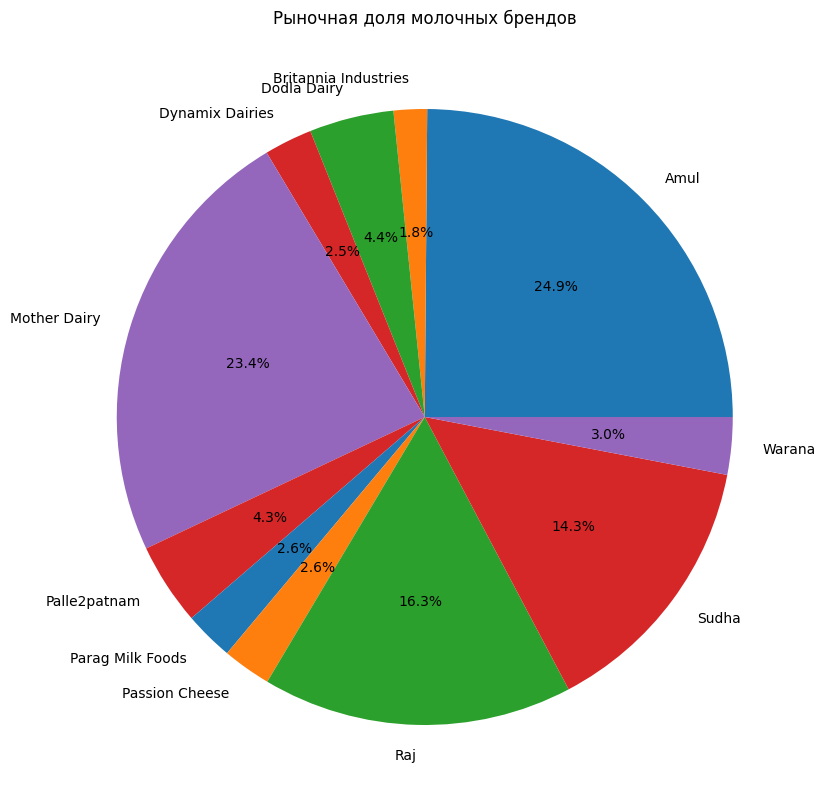

In [135]:
df_brand_market_share = df.groupby('Brand') \
        .agg({'INR': 'sum'}) \
        .reset_index()

plt.figure(figsize=(10, 10))  
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple' , 'tab:red']  

plt.pie(df_brand_market_share['INR'],
        labels=df_brand_market_share['Brand'],
        autopct='%1.1f%%',
        colors=colors)  
plt.title('Рыночная доля молочных брендов')
plt.show()

*Самая высокая доля рынка = Амуль (24,9%), самая низкая доля рынка = Britannia Industries (1,8%)*

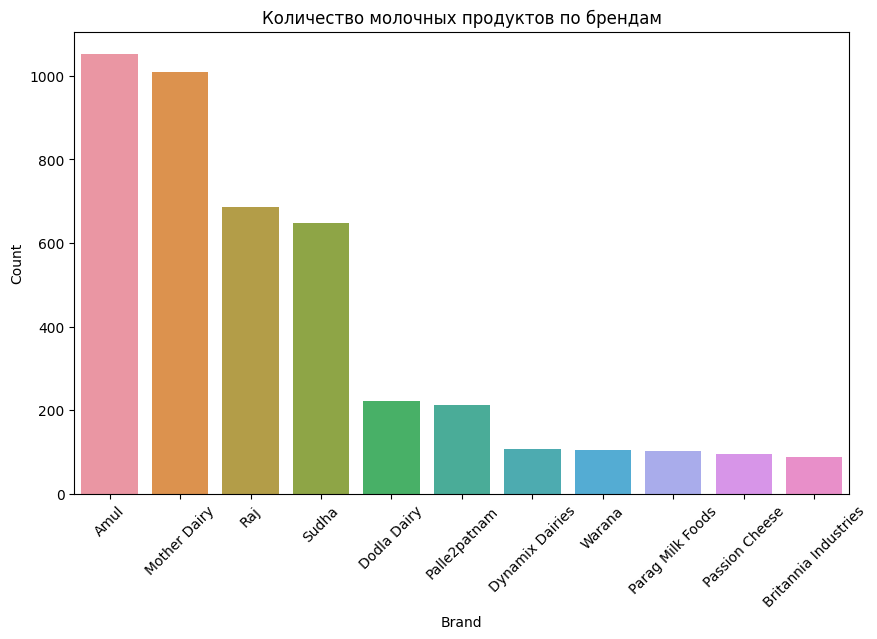

In [139]:
df_brand_counts = df['Brand'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_brand_counts.index, y=df_brand_counts.values)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Количество молочных продуктов по брендам')
plt.xticks(rotation=45)
plt.show()

*График позволяет сравнивать бренды, у которых объем продаж выше или ниже.*

*Самые высокие продажи у бренда Amul.*

*Самые низкие продажи Britannia Industries*

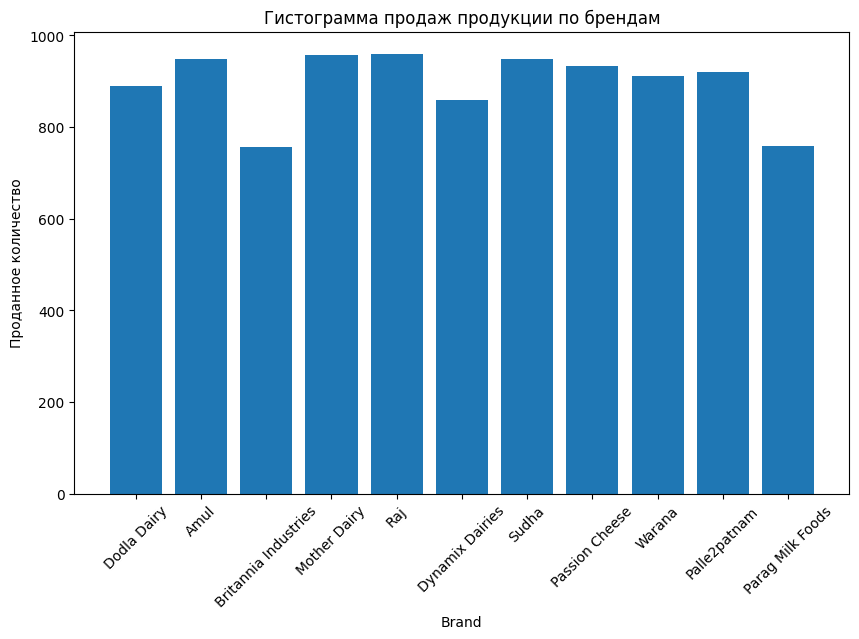

In [140]:
plt.figure(figsize=(10, 6))
plt.bar(df['Brand'], df['Quan_Sold'])
plt.xlabel('Brand')
plt.ylabel('Проданное количество')
plt.title('Гистограмма продаж продукции по брендам')
plt.xticks(rotation=45) 
plt.show()

*Проверяем частоту встречаемости типа продукта*

In [141]:
df['Prod_Name'].value_counts(normalize=True, dropna=False)

Prod_Name
Curd          0.110751
Lassi         0.103353
Paneer        0.101965
Yogurt        0.101040
Buttermilk    0.100578
Butter        0.099653
Milk          0.099191
Ice Cream     0.097803
Ghee          0.092948
Cheese        0.092717
Name: proportion, dtype: float64

**Вывод:**

*Топ самых популярных и продаваемых брендов:*
 - Amul
 - Mother Dairy 
 - Raj
 - Sudha

*Топ типа продукции:*
 - Curd
 - Lassi
 - Paneer
 - Yogurt
 - Buttermilk
 - Butter
 - Milk
 - Ice Cream
 - Ghee
 - Cheese


*Группирую по типу продукции, на какой локации продавалось, какой общий доход по продукту*

In [142]:
df.groupby(['Prod_Name']) \
            .agg({'Loc': 'count', 'INR': 'sum'}) \
            .sort_values('INR', ascending=False) \
            .reset_index() \
            .head(15)

Prod_Name  Loc         INR
0        Curd  479  6743880.73
1      Butter  431  6276041.59
2       Lassi  447  6130168.70
3        Milk  429  6021395.90
4      Paneer  441  5962594.91
5  Buttermilk  435  5767704.18
6      Yogurt  437  5595059.89
7      Cheese  401  5547882.20
8        Ghee  402  5385285.32
9   Ice Cream  423  5304634.44

In [143]:
df_product_counts = df['Prod_Name'].value_counts()
df_product_counts.head(15)

Prod_Name
Curd          479
Lassi         447
Paneer        441
Yogurt        437
Buttermilk    435
Butter        431
Milk          429
Ice Cream     423
Ghee          402
Cheese        401
Name: count, dtype: int64

In [144]:
df_product_names = df_product_counts.index.tolist()
df_product_counts = df_product_counts.tolist()

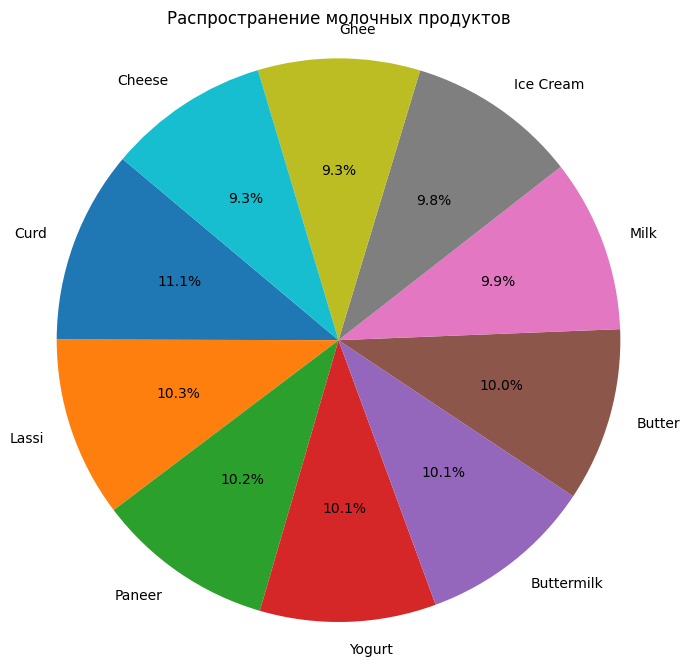

In [145]:
plt.figure(figsize=(8, 8))
plt.pie(df_product_counts, labels=df_product_names, autopct='%1.1f%%', startangle=140)
plt.title('Распространение молочных продуктов')
plt.axis('equal') 
plt.show()

**Вывод: Среди всех молочных продуктов наибольшее распространение имеет творог.**

*Общая стоимость продукции*

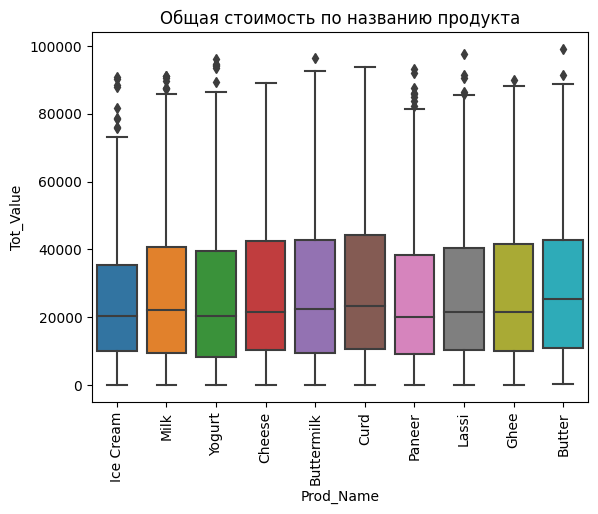

In [146]:
sns.boxplot(data=df, x='Prod_Name', y='Tot_Value')
plt.title('Общая стоимость по названию продукта')
plt.xticks(rotation=90)
plt.show()

**Вывод: наблюдаем большое кол-во выбрасов, информацию необходимо дополнительно фильтровать, по общей стоимости продукции лидирует Curd, Buttermilk, Cheese**

*Общая доходность по названию продукции*

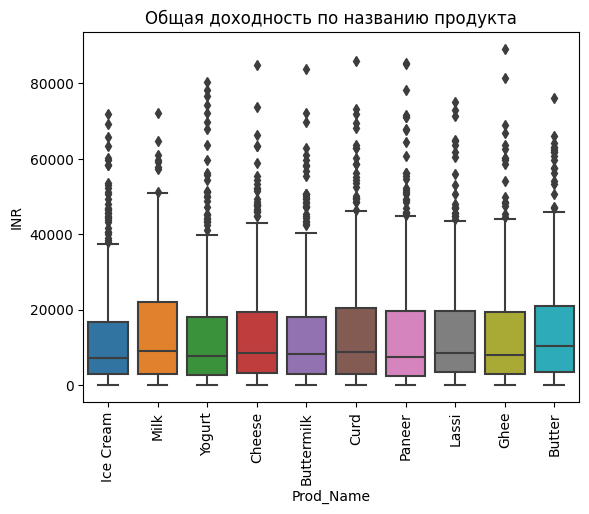

In [147]:
sns.boxplot(data=df, x='Prod_Name', y='INR')
plt.title('Общая доходность по названию продукта')
plt.xticks(rotation=90)
plt.show()

**Вывод: наблюдаем большое кол-во выбрасов, информацию необходимо дополнительно фильтровать, по общей доходности лидируют Milk, Curd, Butter**

*Общий объем продаж молочных продуктов по наименованиям продуктов*

*Проданное количество и цена за единицу*

In [148]:
df.columns

Index(['Loc', 'Tot_Land_Area', 'Num_of_Cows', 'Farm_Size', 'Date', 'Prod_ID', 'Prod_Name', 'Brand', 'Quan', 'Price_per_Unit', 'Tot_Value', 'Shelf_Life', 'Storage_Con', 'Prod_Date', 'Exp_Date', 'Quan_Sold', 'Price_per_Unit(sold)', 'INR', 'Cust_Loc', 'Sales_Channel', 'Quan_in_Stock',
       'Min_Stock_Threshold', 'Reo_Quan'],
      dtype='object')

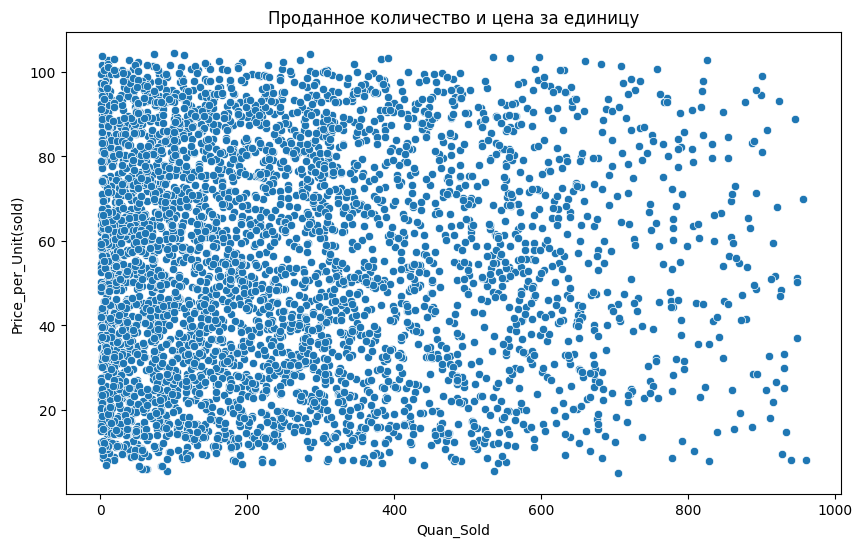

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quan_Sold', y='Price_per_Unit(sold)', data=df)
plt.xlabel('Quan_Sold')
plt.ylabel('Price_per_Unit(sold)')
plt.title('Проданное количество и цена за единицу')
plt.show()

**Основная часть продукции продается в количестве от 1 до 200 единиц.**

In [151]:
df.groupby(['Loc']).agg({'INR': 'sum'}).sort_values('INR', ascending=False).reset_index()

Loc         INR
0       Chandigarh  7538982.35
1            Delhi  6952125.24
2    Uttar Pradesh  3705388.56
3      Maharashtra  3535381.94
4           Kerala  3485112.52
5       Tamil Nadu  3455957.32
6   Madhya Pradesh  3448986.54
7            Bihar  3446206.42
8        Rajasthan  3443553.56
9        Telangana  3367815.11
10     West Bengal  3350541.68
11       Jharkhand  3341338.74
12         Gujarat  3331222.75
13       Karnataka  3288575.76
14         Haryana  3043459.37

In [152]:
df_product_sales = df.groupby(['Prod_Name', 'Brand', 'Loc']).agg({
    'Quan_Sold': 'sum',
    'INR': 'sum'
}).reset_index()

In [153]:
df_product_sales.sample(10)

Prod_Name             Brand            Loc  Quan_Sold        INR
34      Butter  Parag Milk Foods        Haryana        618   53537.95
496     Paneer      Mother Dairy     Chandigarh       2532   97771.87
124     Cheese              Amul        Haryana       2198  108789.34
346  Ice Cream      Palle2patnam     Chandigarh       3941  199650.64
434       Milk              Amul    West Bengal        902   42047.39
204       Curd      Mother Dairy    Maharashtra       2905  203725.88
598     Yogurt      Palle2patnam  Uttar Pradesh        752   57580.85
360      Lassi              Amul          Bihar        891   62155.66
36      Butter  Parag Milk Foods      Karnataka       2011  114961.78
330  Ice Cream      Mother Dairy          Bihar        598   11576.08

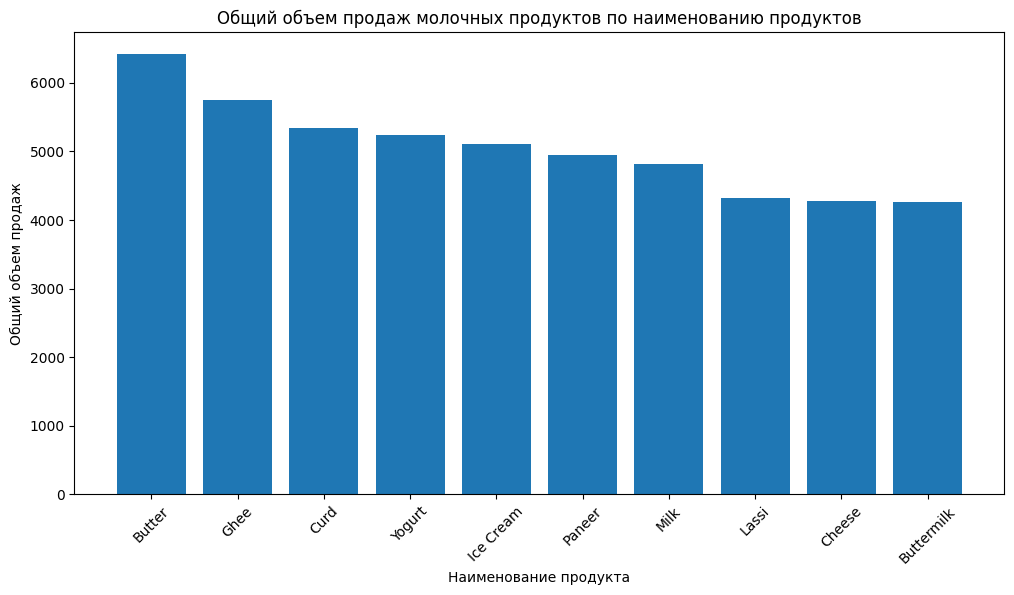

In [154]:
plt.figure(figsize=(12, 6))
df_product_sales_sorted = df_product_sales.sort_values('Quan_Sold', ascending=False)
plt.bar(df_product_sales_sorted['Prod_Name'], df_product_sales_sorted['Quan_Sold'])
plt.xlabel('Наименование продукта')
plt.ylabel('Общий объем продаж')
plt.title('Общий объем продаж молочных продуктов по наименованию продуктов')
plt.xticks(rotation=45)
plt.show()

**Вывод: По общему объему продаж лидирует Butter, Ghee, Curd, Yogurt**

*Сгруппируем данные по местоположению и рассчитаем сумму общей стоимости для каждого местоположения.*

In [155]:
df_location_tot_value = df.groupby('Loc')['Tot_Value'].sum().reset_index()
df_location_tot_value.head(10)

Loc     Tot_Value
0           Bihar  6.574214e+06
1      Chandigarh  1.442881e+07
2           Delhi  1.417657e+07
3         Gujarat  7.002026e+06
4         Haryana  6.361192e+06
5       Jharkhand  6.784911e+06
6       Karnataka  7.108868e+06
7          Kerala  6.699829e+06
8  Madhya Pradesh  7.371250e+06
9     Maharashtra  6.956075e+06

In [156]:
df_location_tot_value = df_location_tot_value.sort_values(by='Tot_Value', ascending=False)
df_location_tot_value.head(5)

Loc     Tot_Value
1       Chandigarh  1.442881e+07
2            Delhi  1.417657e+07
13   Uttar Pradesh  8.034919e+06
8   Madhya Pradesh  7.371250e+06
6        Karnataka  7.108868e+06

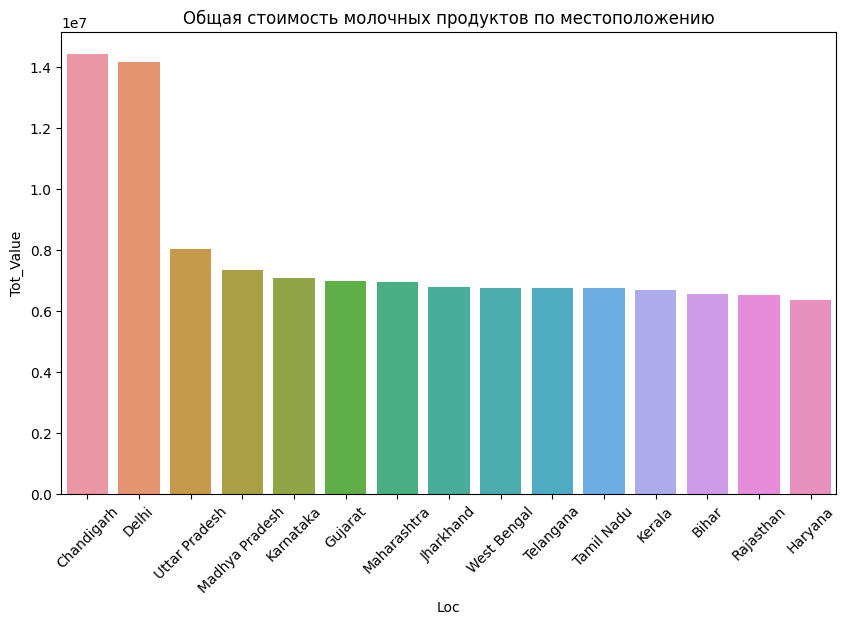

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Loc', y='Tot_Value', data=df_location_tot_value)
plt.xlabel('Loc')
plt.ylabel('Tot_Value')
plt.title('Общая стоимость молочных продуктов по местоположению')
plt.xticks(rotation=45)
plt.show()

**В Chandigarh, Delhi самая высокая общая стоимость молочных продуктов.**

***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.


*Берем для анализа каналы продаж*

In [158]:
df.head(1)

Loc  Tot_Land_Area  Num_of_Cows Farm_Size       Date  Prod_ID  Prod_Name        Brand   Quan  Price_per_Unit  Tot_Value  Shelf_Life Storage_Con  Prod_Date   Exp_Date  Quan_Sold  Price_per_Unit(sold)     INR        Cust_Loc Sales_Channel  Quan_in_Stock  Min_Stock_Threshold  Reo_Quan
0  Telangana         310.84           96    Medium 2022-02-17        5  Ice Cream  Dodla Dairy  222.4           85.72  19064.128          25      Frozen 2021-12-27 2022-01-21          7                 82.24  575.68  Madhya Pradesh     Wholesale            215                19.55     64.03

In [159]:
df.columns

Index(['Loc', 'Tot_Land_Area', 'Num_of_Cows', 'Farm_Size', 'Date', 'Prod_ID', 'Prod_Name', 'Brand', 'Quan', 'Price_per_Unit', 'Tot_Value', 'Shelf_Life', 'Storage_Con', 'Prod_Date', 'Exp_Date', 'Quan_Sold', 'Price_per_Unit(sold)', 'INR', 'Cust_Loc', 'Sales_Channel', 'Quan_in_Stock',
       'Min_Stock_Threshold', 'Reo_Quan'],
      dtype='object')

In [160]:
df.groupby(['Loc']).agg({'Sales_Channel': 'count', 'Quan_Sold': 'sum'}) \
    .sort_values('Quan_Sold', ascending=False) \
    .reset_index() \
    .head(15)

Loc  Sales_Channel  Quan_Sold
0       Chandigarh            519     134625
1            Delhi            525     130096
2        Rajasthan            256      67102
3      Maharashtra            255      66085
4   Madhya Pradesh            259      64531
5          Gujarat            267      64057
6    Uttar Pradesh            276      64015
7            Bihar            245      62395
8        Karnataka            261      62037
9        Telangana            248      61293
10      Tamil Nadu            223      61045
11          Kerala            249      60231
12         Haryana            253      59828
13       Jharkhand            248      57917
14     West Bengal            241      57754

*Строим распределение каналов продаж*

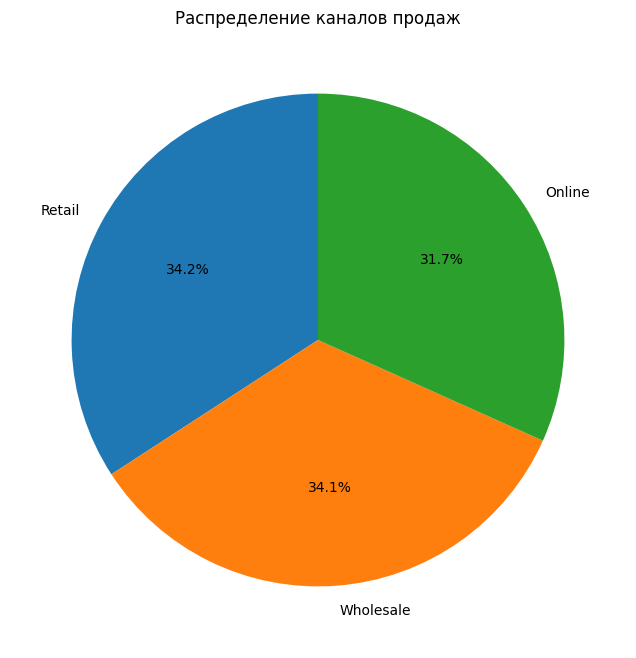

In [161]:
df_sales_channel_counts = df['Sales_Channel'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(df_sales_channel_counts.values, labels=df_sales_channel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение каналов продаж')
plt.show()

**Вывод: большая часть товаров реализуется через розницу и оптом**


*Рассматриваем предпочтение клиентов по местоположению и каналу продаж*

*Сгруппировал данные по «Местоположению» и «Каналу продаж» и рассчитал сумму «Прибл. Общий доход (INR)» и «Проданное количество (литры/кг)»*


In [162]:
df_customer_preferences = df.groupby(['Loc', 'Sales_Channel']) \
    .agg({
    'INR': 'sum',
    'Quan_Sold': 'sum'
}).reset_index()

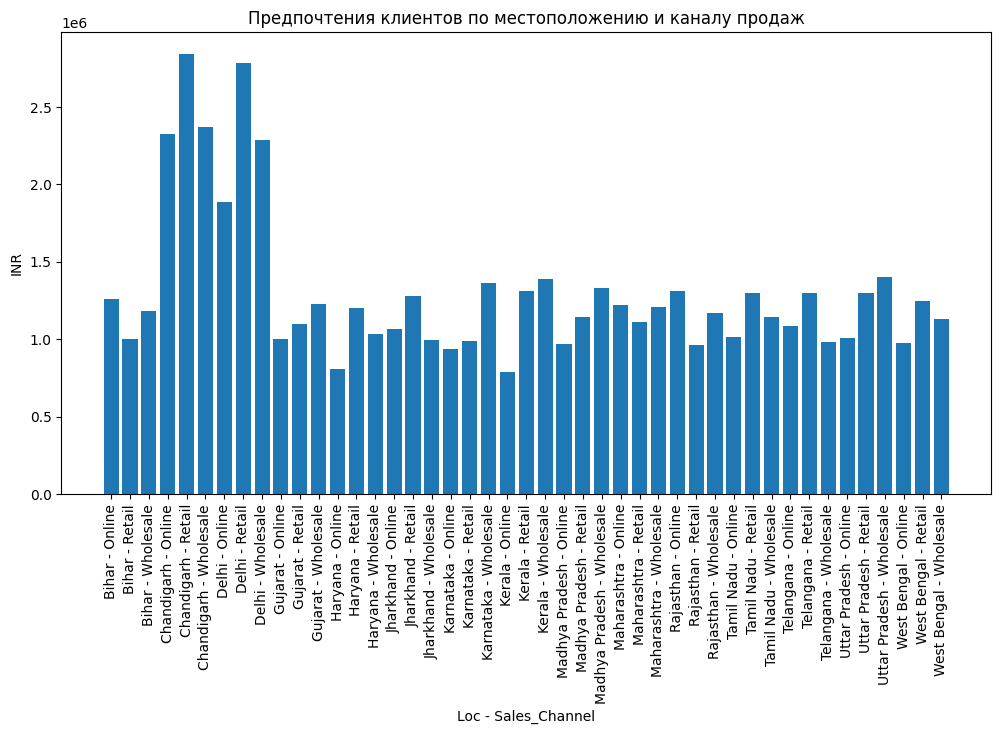

In [163]:
plt.figure(figsize=(12, 6))
x = df_customer_preferences['Loc'] + ' - ' + df_customer_preferences['Sales_Channel']
plt.bar(x, df_customer_preferences['INR'])
plt.xlabel('Loc - Sales_Channel')
plt.ylabel('INR')
plt.title('Предпочтения клиентов по местоположению и каналу продаж')
plt.xticks(rotation=90)
plt.show()


**Вывод: основные предпочтения Chandigarh-Online, Delhi-Retail**

In [164]:
df_sales_channels = df_customer_preferences['Sales_Channel'].unique()

In [165]:
df_sales_channels

array(['Online', 'Retail', 'Wholesale'], dtype=object)

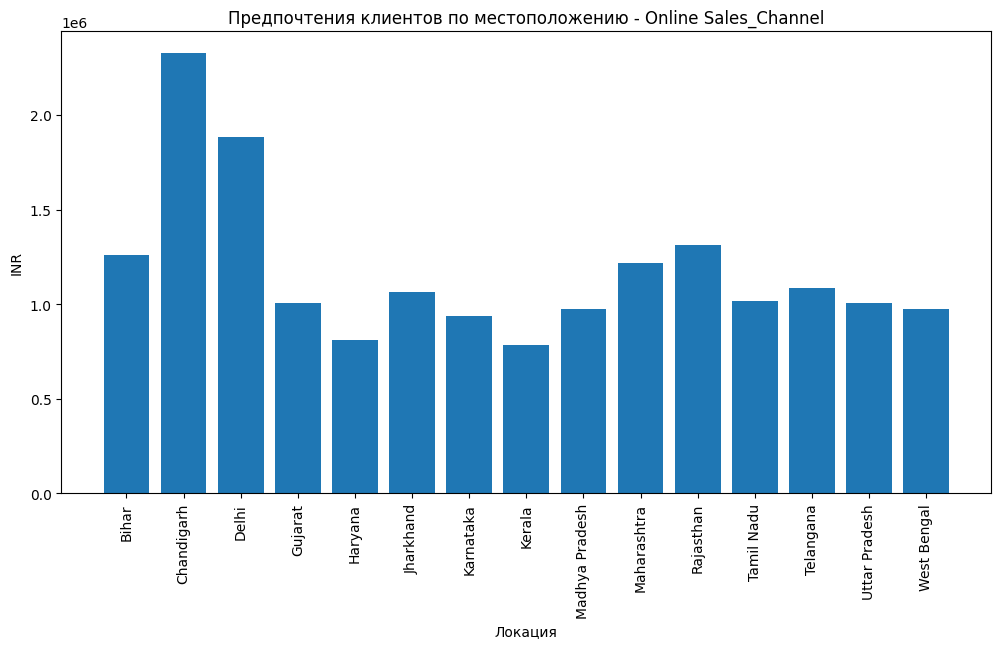

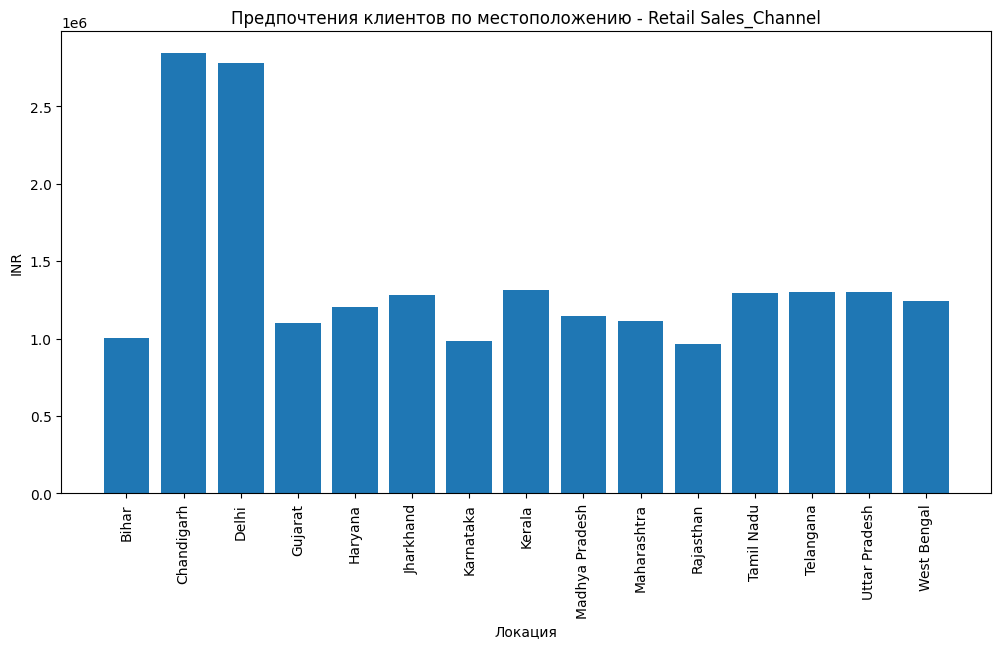

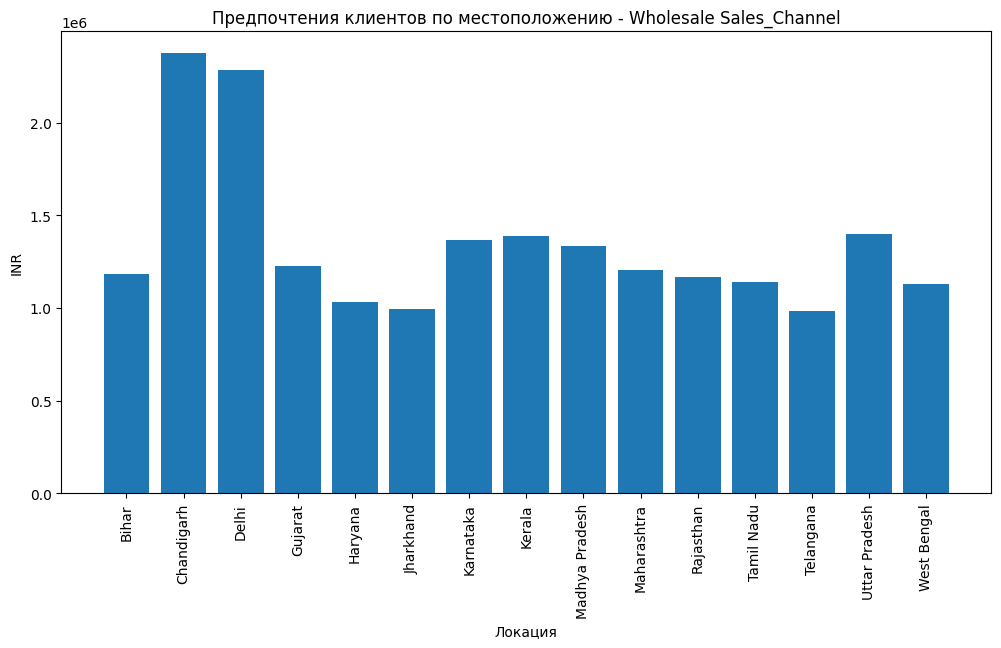

In [166]:
for sales_channel in df_sales_channels:
    plt.figure(figsize=(12, 6))
    df_sales_channel_data = df_customer_preferences[df_customer_preferences['Sales_Channel'] == sales_channel]
    x = df_sales_channel_data['Loc']
    plt.bar(x, df_sales_channel_data[ 'INR'])
    plt.xlabel('Локация')
    plt.ylabel('INR')
    plt.title(f'Предпочтения клиентов по местоположению - {sales_channel} Sales_Channel')
    plt.xticks(rotation=90)
    plt.show()

*Произведем анализ покупательского поведения в зависимости от местоположения и канала продаж*


In [167]:
df_buying_behavior = df.groupby(['Loc', 'Sales_Channel']) \
    .agg({
    'Quan_Sold': 'mean',
    'Price_per_Unit(sold)': 'mean'
}).reset_index()

In [168]:
df_buying_behavior.head(5)

Loc Sales_Channel   Quan_Sold  Price_per_Unit(sold)
0       Bihar        Online  238.352273             59.365000
1       Bihar        Retail  251.250000             53.912778
2       Bihar     Wholesale  274.470588             52.528235
3  Chandigarh        Online  262.496970             54.199636
4  Chandigarh        Retail  264.209945             57.646464

In [169]:
df_buying_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loc                   45 non-null     object 
 1   Sales_Channel         45 non-null     object 
 2   Quan_Sold             45 non-null     float64
 3   Price_per_Unit(sold)  45 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.5+ KB


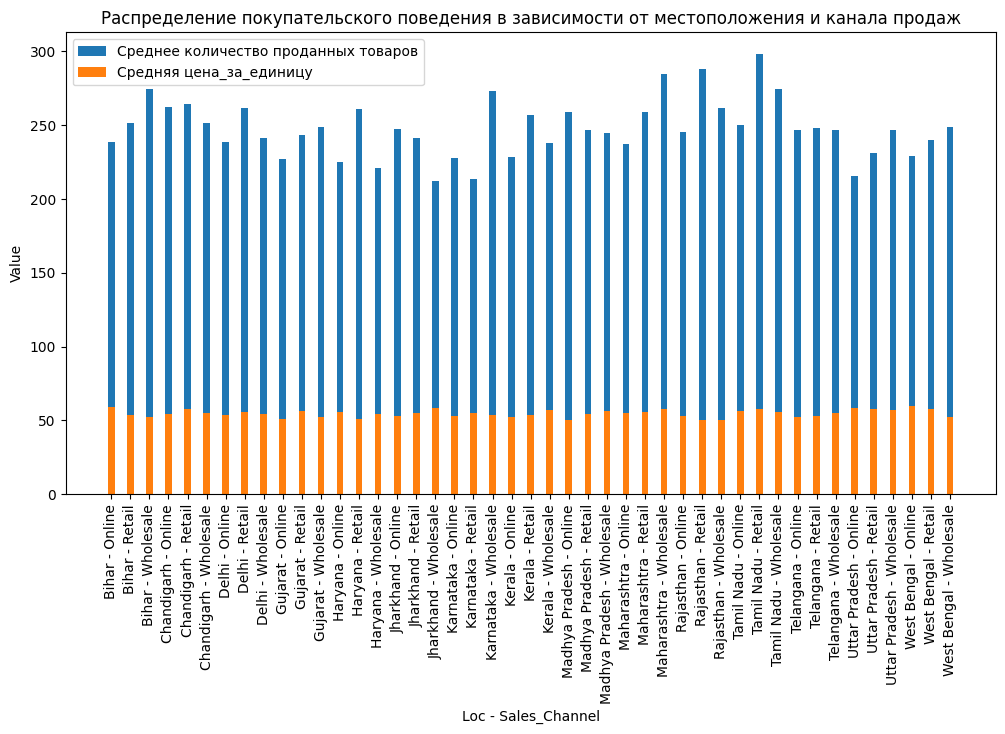

In [170]:
plt.figure(figsize=(12, 6))
width = 0.35
x = df_buying_behavior['Loc'] + ' - ' + df_buying_behavior['Sales_Channel']
plt.bar(x, df_buying_behavior['Quan_Sold'], width, label='Среднее количество проданных товаров')
plt.bar(x, df_buying_behavior['Price_per_Unit(sold)'], width, label='Средняя цена_за_единицу')
plt.xlabel('Loc - Sales_Channel')
plt.ylabel('Value')
plt.title('Распределение покупательского поведения в зависимости от местоположения и канала продаж')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Вывод: Канал розничных продаж в Тамилнаде имеет самый высокий средний объем продаж, аналогична ситуация в Maharashtra. Самая высокая средняя цена за единицу: Bihar, Chandigarh, Gujarat, Haryana, Jharkhand, Kerala, Tamil Nadu, West Bengal - но необходимо увеличивать кол-во проданных товаров, потенциальное ухкое место, требуется модель продаж (корректировка), стратегическое планирование.**

*Построим тепловую карту: количество молочных продуктов по брендам и местоположению покупателей*

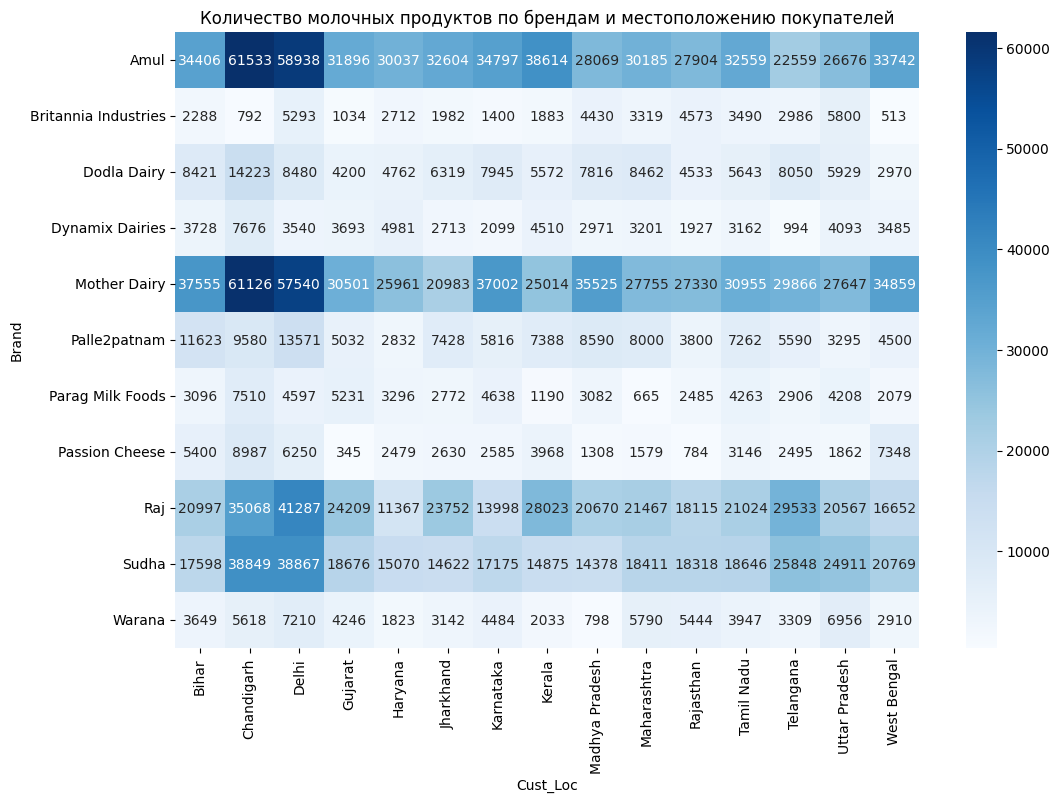

In [171]:
df_brand_customer_matrix = df.pivot_table(values='Quan', index='Brand', columns='Cust_Loc', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(df_brand_customer_matrix, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Cust_Loc')
plt.ylabel('Brand')
plt.title('Количество молочных продуктов по брендам и местоположению покупателей')
plt.show()

***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

'Loc' - Местоположение: Географическое положение молочной фермы.
'Num_of_Cows' - Количество коров: количество коров на молочной ферме.
'Date' - Дата: дата записи данных.
'Prod_Name' - Название продукта: Название молочного продукта.
'Brand' - Бренд: бренд, связанный с молочным продуктом.
'Quan' - Количество (л/кг): Количество доступного молочного продукта.
'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.
'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.
'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.
'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.
'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.
'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

*Поработаем со складским запасом*

In [172]:
df_date.head(1)

Loc  Prod_Name  Tot_Value     INR       Date  Prod_Date   Exp_Date Date_name  Date_year  Date_month  Quan_Sold*Price_sold   Quan        Brand
0  Telangana  Ice Cream  19064.128  575.68 2022-02-17 2021-12-27 2022-01-21  Thursday       2022           2                575.68  222.4  Dodla Dairy

In [173]:
df_stocks = df.copy(deep=True)

In [174]:
df_stocks['Date_name'] = df_date['Date_name']
df_stocks['Date_year'] = df_date['Date_year']
df_stocks['Date_month'] = df_date['Date_month']

In [175]:
df_stocks.head(1)

Loc  Tot_Land_Area  Num_of_Cows Farm_Size       Date  Prod_ID  Prod_Name        Brand   Quan  Price_per_Unit  Tot_Value  Shelf_Life Storage_Con  Prod_Date   Exp_Date  Quan_Sold  Price_per_Unit(sold)     INR        Cust_Loc Sales_Channel  Quan_in_Stock  Min_Stock_Threshold  Reo_Quan  \
0  Telangana         310.84           96    Medium 2022-02-17        5  Ice Cream  Dodla Dairy  222.4           85.72  19064.128          25      Frozen 2021-12-27 2022-01-21          7                 82.24  575.68  Madhya Pradesh     Wholesale            215                19.55     64.03   

  Date_name  Date_year  Date_month  
0  Thursday       2022           2

In [176]:
df_stocks[['Date', 'Loc', 'Num_of_Cows', 'Brand', 'Prod_Name', 'Quan', 'Quan_Sold', 'Quan_in_Stock', 'Min_Stock_Threshold', 'Reo_Quan', 'Tot_Value', 'Price_per_Unit', 'Date_name', 'Date_month', 'Date_year']].head(1)

Date        Loc  Num_of_Cows        Brand  Prod_Name   Quan  Quan_Sold  Quan_in_Stock  Min_Stock_Threshold  Reo_Quan  Tot_Value  Price_per_Unit Date_name  Date_month  Date_year
0 2022-02-17  Telangana           96  Dodla Dairy  Ice Cream  222.4          7            215                19.55     64.03  19064.128           85.72  Thursday           2       2022

In [177]:
df_stocks.dtypes

Loc                             object
Tot_Land_Area                  float64
Num_of_Cows                      int64
Farm_Size                       object
Date                    datetime64[ns]
Prod_ID                          int64
Prod_Name                       object
Brand                           object
Quan                           float64
Price_per_Unit                 float64
Tot_Value                      float64
Shelf_Life                       int64
Storage_Con                     object
Prod_Date               datetime64[ns]
Exp_Date                datetime64[ns]
Quan_Sold                        int64
Price_per_Unit(sold)           float64
INR                            float64
Cust_Loc                        object
Sales_Channel                   object
Quan_in_Stock                    int64
Min_Stock_Threshold            float64
Reo_Quan                       float64
Date_name                       object
Date_year                        int32
Date_month               

*Определим тип продукции и какой складской остаток*

'Loc' - Местоположение: Географическое положение молочной фермы.
'Num_of_Cows' - Количество коров: количество коров на молочной ферме.
'Date' - Дата: дата записи данных.
'Prod_Name' - Название продукта: Название молочного продукта.
'Brand' - Бренд: бренд, связанный с молочным продуктом.
'Quan' - Количество (л/кг): Количество доступного молочного продукта.
'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.
'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.
'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.
'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.
'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.
'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

In [178]:
Prod_Name_stocks = df_stocks.groupby(['Date_year', 'Date_month', 'Loc', 'Prod_Name']) \
    .agg({'Quan':'sum', 'Quan_Sold':'sum', 'Price_per_Unit(sold)':'median', 'Quan_in_Stock':'median', 'Price_per_Unit':'median', 'INR':'sum'}) \
    .reset_index()

In [179]:
Prod_Name_stocks.head(5)

Date_year  Date_month    Loc   Prod_Name    Quan  Quan_Sold  Price_per_Unit(sold)  Quan_in_Stock  Price_per_Unit       INR
0       2019           1  Bihar  Buttermilk  152.80        111                57.760           41.0          61.520   6411.36
1       2019           1  Bihar        Curd  863.98        105                15.860          758.0          15.770   1665.30
2       2019           1  Bihar   Ice Cream  640.53          2                66.260          638.0          65.310    132.52
3       2019           1  Bihar        Milk  396.31        331                66.640           65.0          62.560  22057.84
4       2019           1  Bihar      Paneer  536.55        366                76.735           84.5          76.625  26050.20

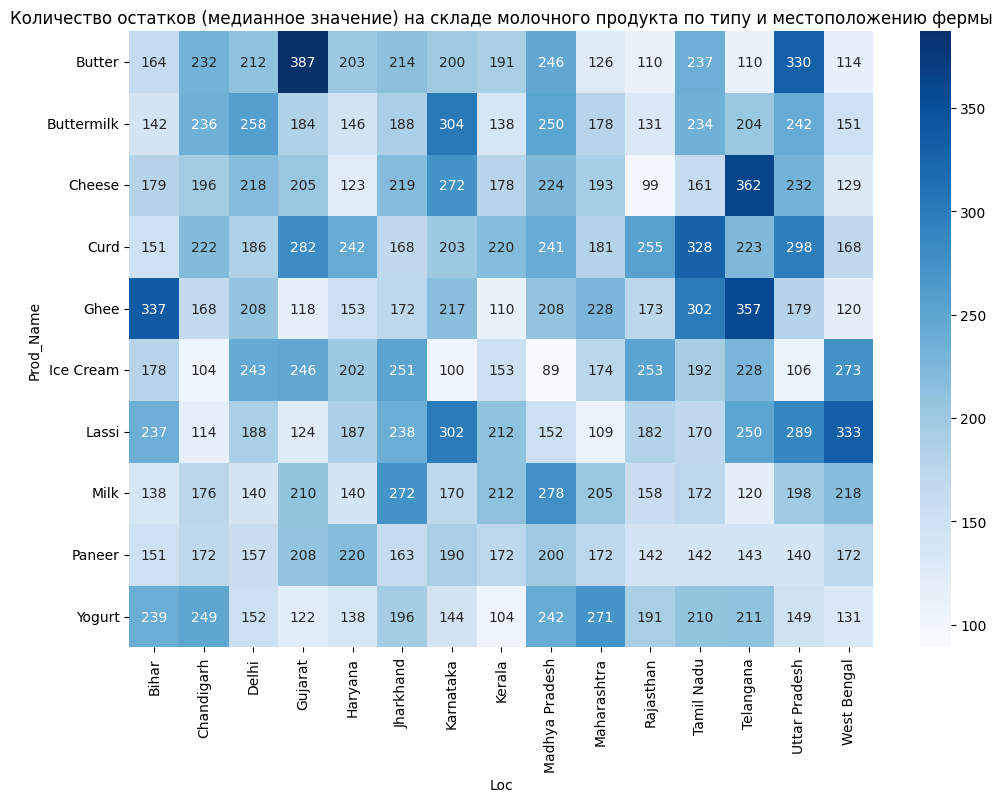

In [180]:
df_stocks_matrix =  df_stocks.pivot_table(values='Quan_in_Stock', index='Prod_Name', columns='Loc', aggfunc='median')
plt.figure(figsize=(12, 8))
sns.heatmap(df_stocks_matrix, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Loc')
plt.ylabel('Prod_Name')
plt.title('Количество остатков (медианное значение) на складе молочного продукта по типу и местоположению фермы')
plt.show()

**Вывод: каждый остаток на складе, с низким сроком хранения продукта, является потерей для компании/фермы**

In [181]:
df_stocks_year = df_stocks['Date_year'].unique()

In [182]:
df_stocks_year

array([2022, 2021, 2019, 2020])

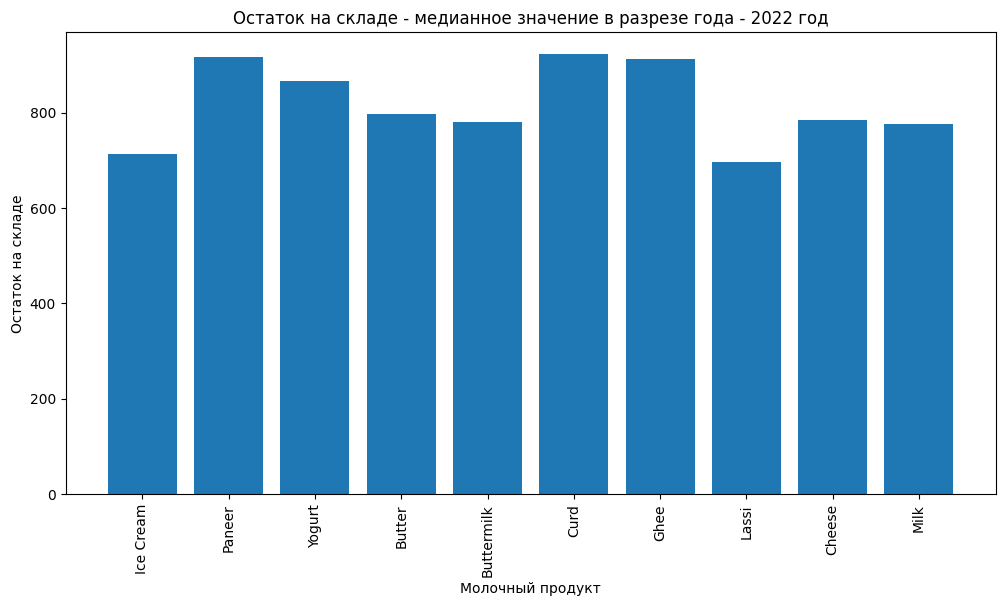

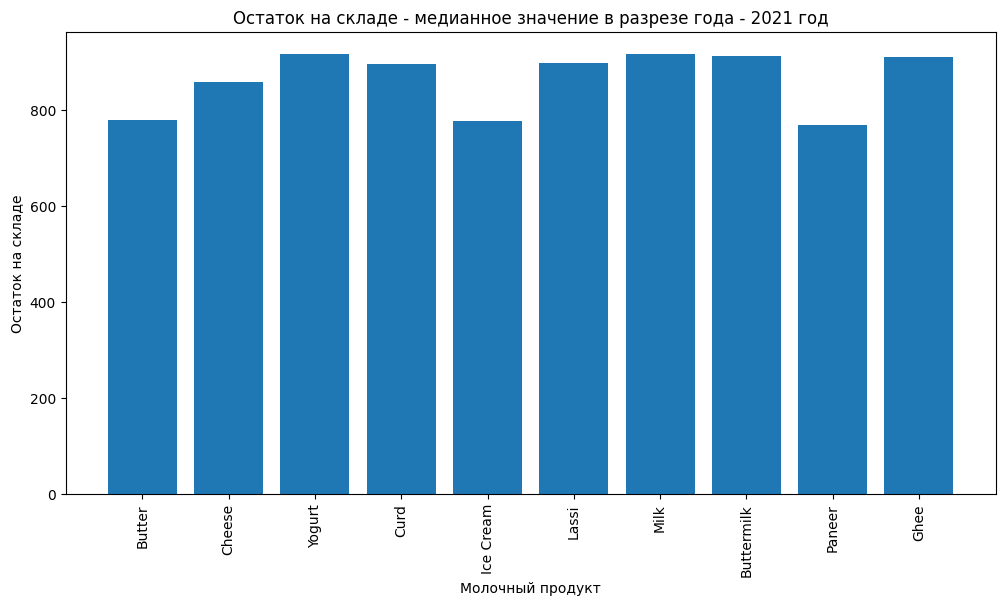

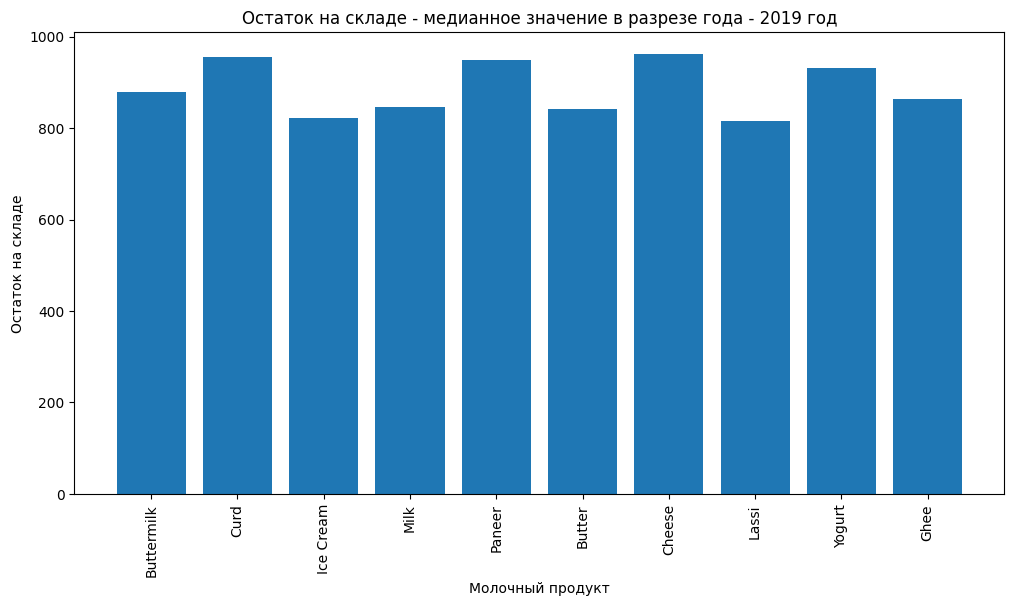

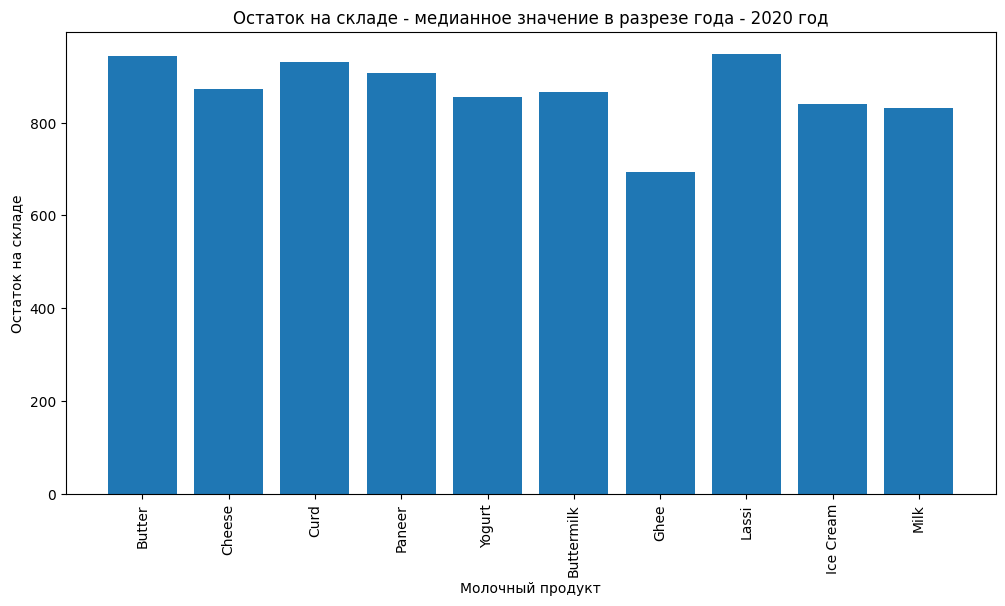

In [183]:
for date_stocks_year in df_stocks_year:
    plt.figure(figsize=(12, 6))
    df_stocks_year_quan = Prod_Name_stocks[Prod_Name_stocks['Date_year'] == date_stocks_year]
    x = df_stocks_year_quan['Prod_Name']
    plt.bar(x, df_stocks_year_quan['Quan_in_Stock'])
    plt.xlabel('Молочный продукт')
    plt.ylabel('Остаток на складе')
    plt.title(f'Остаток на складе - медианное значение в разрезе года - {date_stocks_year} год')
    plt.xticks(rotation=90)
    plt.show()



**Вывод: большое кол-во остатков на складе, потенциальное узкое место производства, требуется корректировка оперативного планирования, модель продаж требуется оптимизация. Значение сильно превышает минимальный порог остатков и уровень для потенциала**

*Возьмём на рассмотрение параметр условие хранения*

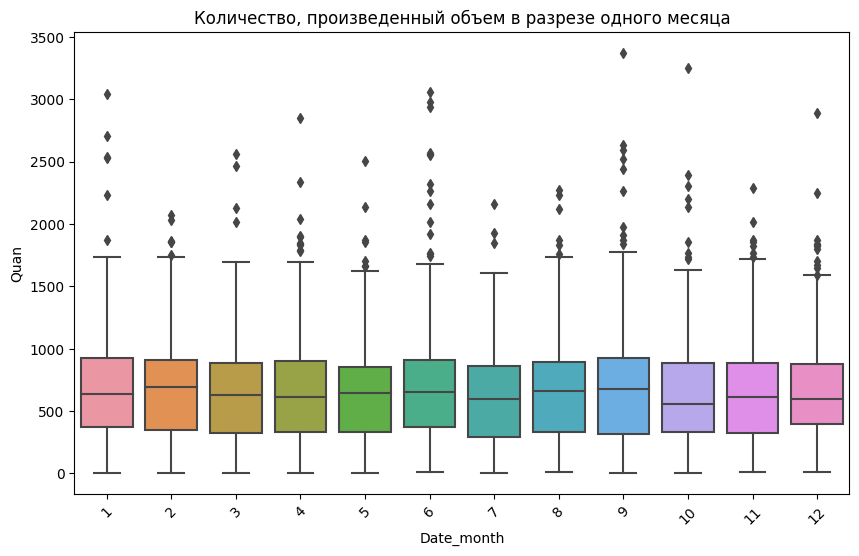

In [185]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Date_month', y='Quan', data=Prod_Name_stocks)
plt.xlabel('Date_month')
plt.ylabel('Quan')
plt.title('Количество, произведенный объем в разрезе одного месяца')
plt.xticks(rotation=45)
plt.show()

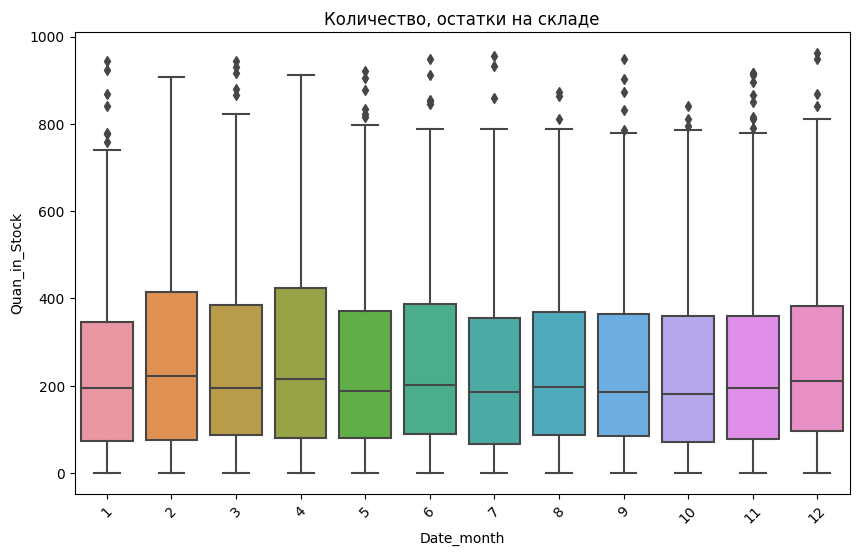

In [186]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Date_month', y='Quan_in_Stock', data=Prod_Name_stocks)
plt.xlabel('Date_month')
plt.ylabel('Quan_in_Stock')
plt.title('Количество, остатки на складе')
plt.xticks(rotation=45)
plt.show()

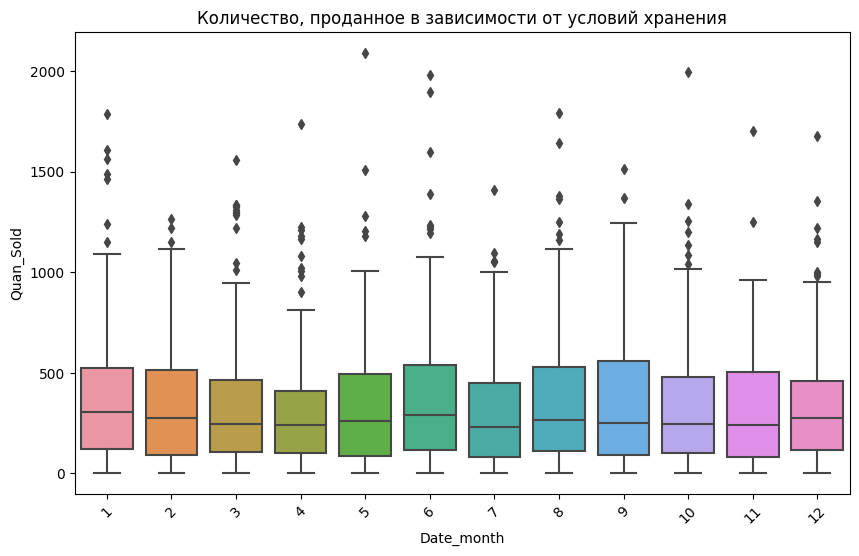

In [187]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Date_month', y='Quan_Sold', data=Prod_Name_stocks)
plt.xlabel('Date_month')
plt.ylabel('Quan_Sold')
plt.title('Количество, проданное в зависимости от условий хранения')
plt.xticks(rotation=45)
plt.show()

**Вывод: присутствуют выбросы, необходимо дополнительно проводить фильтрацию, после повторять процесс анализа. Стабильность производства из месяца в месяц соблюдается, показатели без значительных изменений. Еще один факт, что в случае нарушения модели продаж, появляются потери, не учтены все риски или вообще отсутствует модель продаж. Наблюдаются волнобразные скачки, если посмотреть объем производства, он стабилен. Требуется корректировка процессов, экономический эффект имеется.**

In [188]:
Prod_Name_stocks.head(5)

Date_year  Date_month    Loc   Prod_Name    Quan  Quan_Sold  Price_per_Unit(sold)  Quan_in_Stock  Price_per_Unit       INR
0       2019           1  Bihar  Buttermilk  152.80        111                57.760           41.0          61.520   6411.36
1       2019           1  Bihar        Curd  863.98        105                15.860          758.0          15.770   1665.30
2       2019           1  Bihar   Ice Cream  640.53          2                66.260          638.0          65.310    132.52
3       2019           1  Bihar        Milk  396.31        331                66.640           65.0          62.560  22057.84
4       2019           1  Bihar      Paneer  536.55        366                76.735           84.5          76.625  26050.20

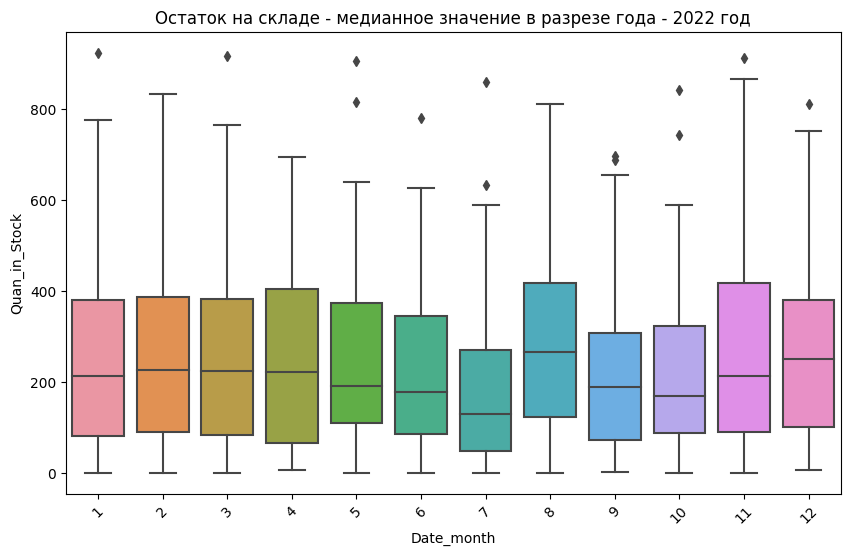

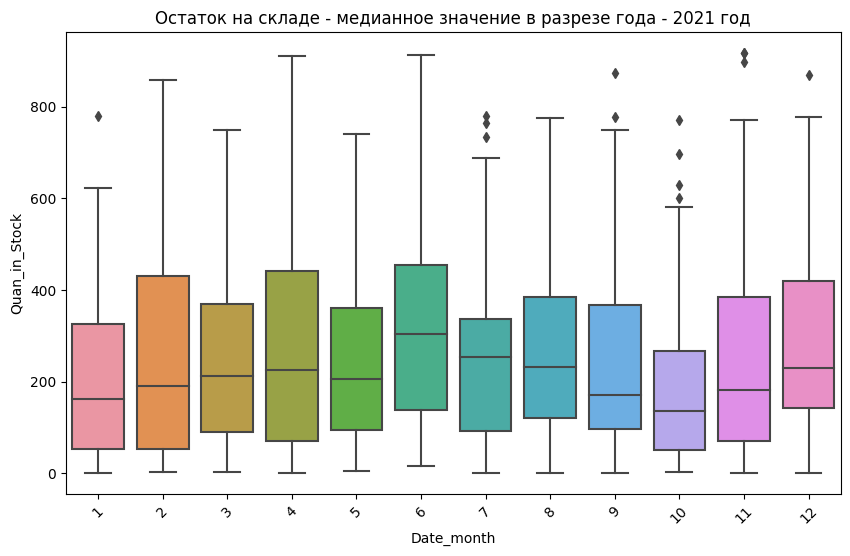

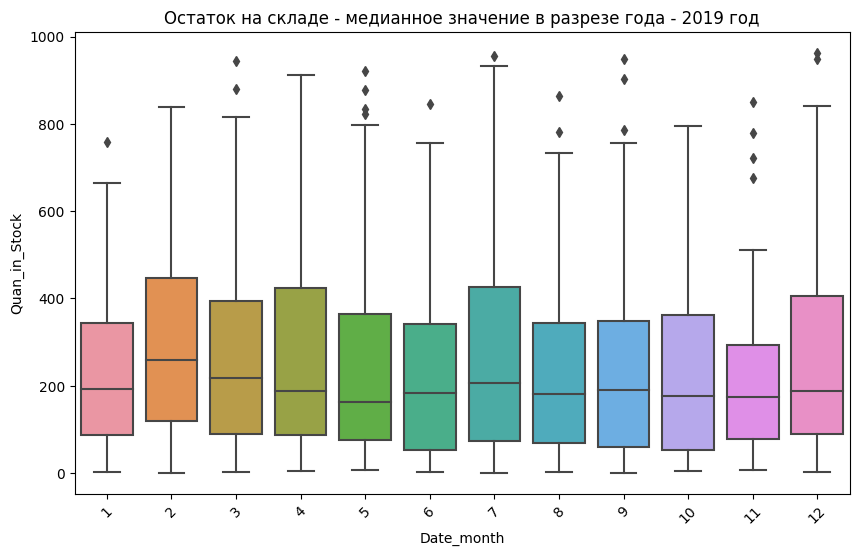

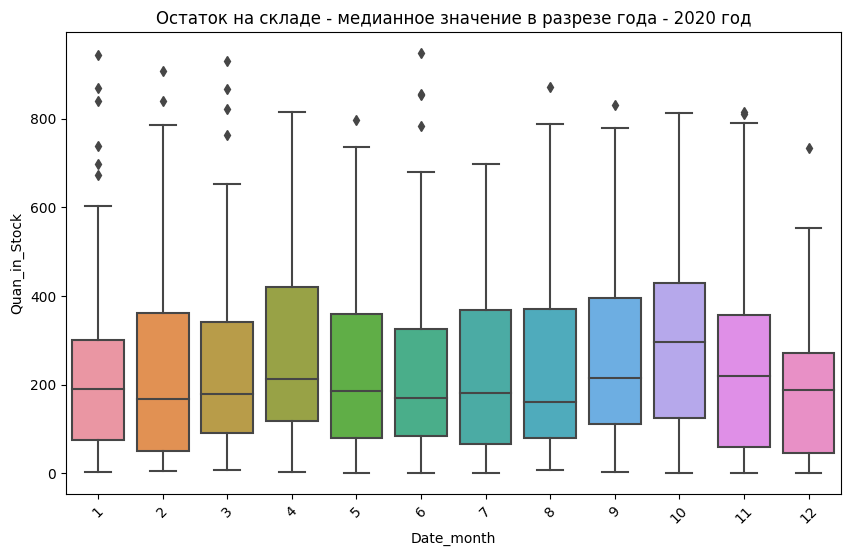

In [189]:
for date_stocks_year in df_stocks_year:
    plt.figure(figsize=(10, 6))
    df_stocks_year_quan = Prod_Name_stocks[Prod_Name_stocks['Date_year'] == date_stocks_year]
    x = df_stocks_year_quan['Date_month']
    sns.boxplot(x='Date_month', y='Quan_in_Stock', data=df_stocks_year_quan)
    plt.xlabel('Date_month')
    plt.ylabel('Quan_in_Stock')
    plt.title(f'Остаток на складе - медианное значение в разрезе года - {date_stocks_year} год')
    plt.xticks(rotation=45)
    plt.show()


**Вывод: по всему периоду, высокий уровень складских остатков, потенциальное узкое место, требуется оптимизация. В разрезе года, наблюдается стабильность в объеме складских остатков**

*Постороим корреляционную матрицу реквизитов*

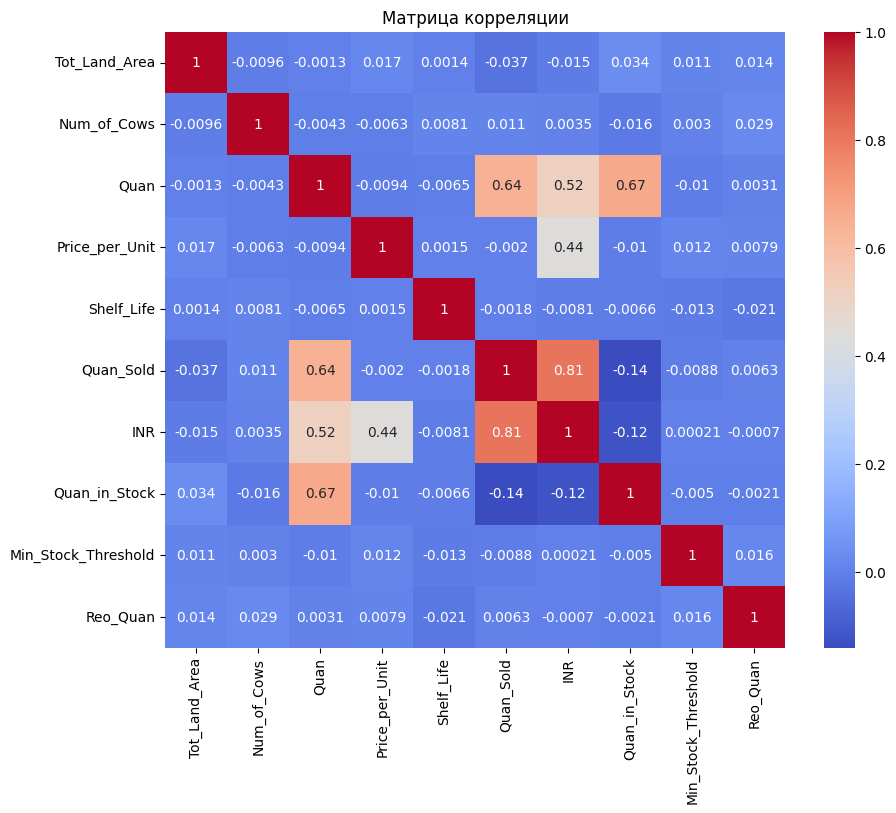

In [190]:
df_corr_matrix = df[['Tot_Land_Area', 'Num_of_Cows', 'Quan', 'Price_per_Unit',
                  'Shelf_Life', 'Quan_Sold', 'INR',
                  'Quan_in_Stock', 'Min_Stock_Threshold',
                  'Reo_Quan']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()


**Вывод: наиболее сильная корреляция наблюдается между приблизительным общим доходом (INR) и проданным количеством (литры/кг). А также между Произведенным продуктом, проданным и остатками на складе**

***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

*Проданное количество в зависимости от условий хранения*

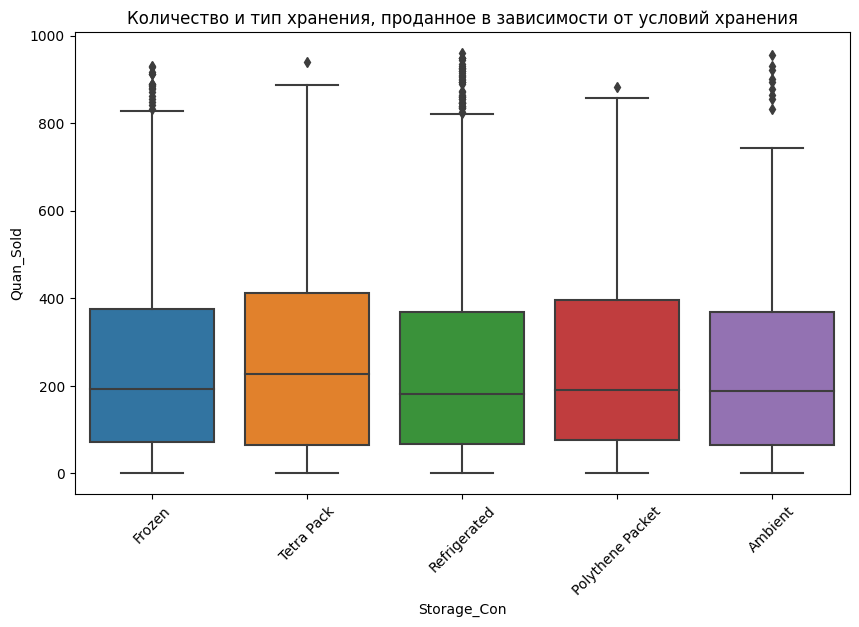

In [191]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Storage_Con', y='Quan_Sold', data=df)
plt.xlabel('Storage_Con')
plt.ylabel('Quan_Sold')
plt.title('Количество и тип хранения, проданное в зависимости от условий хранения')
plt.xticks(rotation=45)
plt.show()

*Cрок годности*

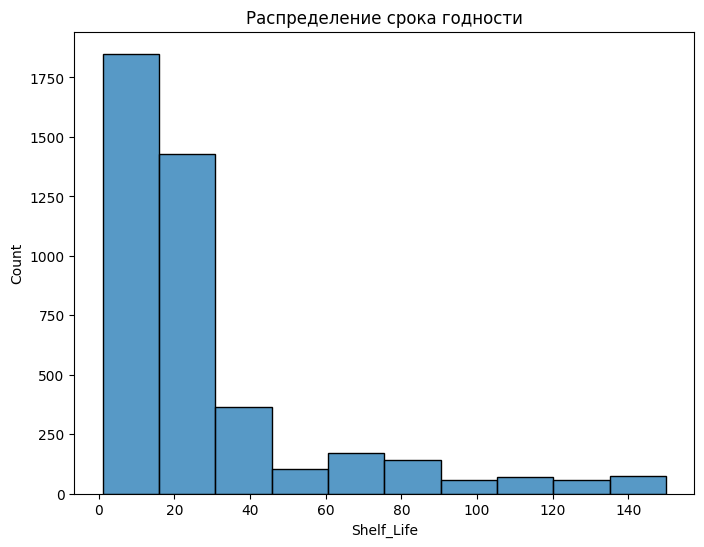

In [192]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Shelf_Life'], bins=10)
plt.xlabel('Shelf_Life')
plt.ylabel('Count')
plt.title('Распределение срока годности')
plt.show()

**Вывод: дает представление об общем диапазоне сроков годности и частоте различных значений срока годности.**

In [193]:
df_shelf_life_impact = df.groupby(['Shelf_Life']).agg({
    'Quan_in_Stock': 'sum'
}).reset_index()

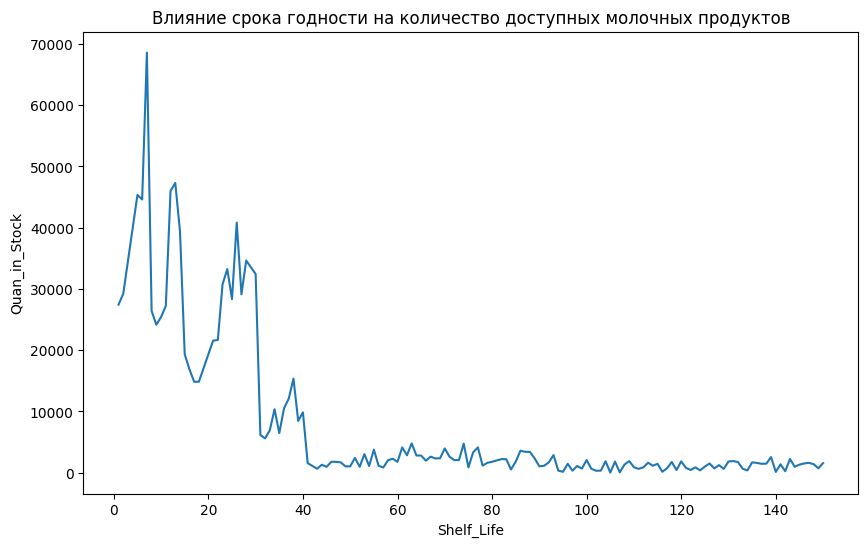

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(df_shelf_life_impact['Shelf_Life'], df_shelf_life_impact['Quan_in_Stock'])
plt.xlabel('Shelf_Life')
plt.ylabel('Quan_in_Stock')
plt.title('Влияние срока годности на количество доступных молочных продуктов')
plt.show()

*Сделаем анализ, влияние условий хранения на количество доступных молочных продуктов*

In [195]:
df_storage_impact = df.groupby(['Storage_Con']).agg({
    'Quan_in_Stock': 'sum'
}).reset_index()

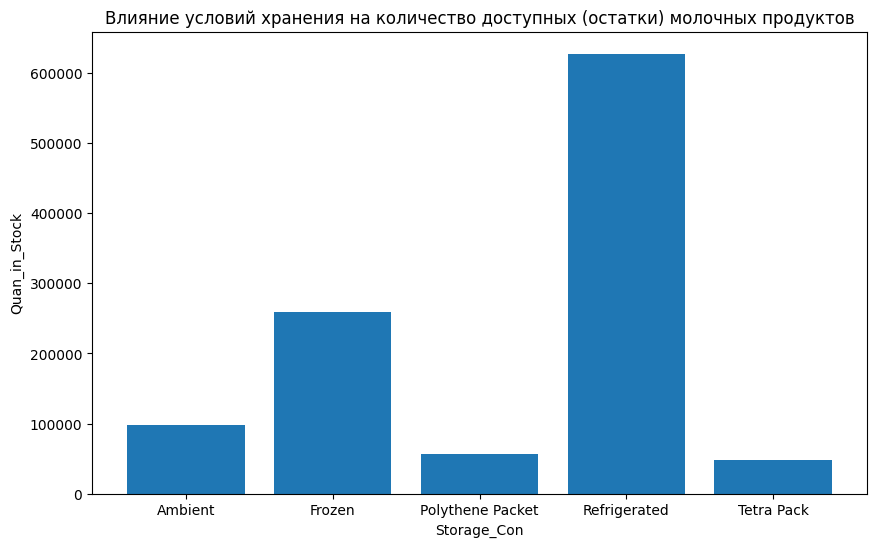

In [196]:
df_shelf_life_impact = df.groupby(['Shelf_Life']).agg({
    'Quan_in_Stock': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(df_storage_impact['Storage_Con'], df_storage_impact['Quan_in_Stock'])
plt.xlabel('Storage_Con')
plt.ylabel('Quan_in_Stock')
plt.title('Влияние условий хранения на количество доступных (остатки) молочных продуктов')
plt.show()

**Вывод: самые перспективные варианты это заморозка и холодильник**

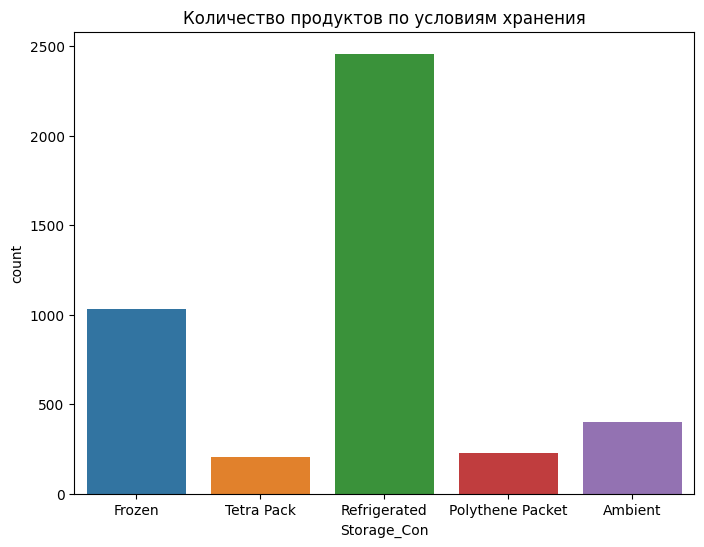

In [197]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Storage_Con', data=df)
plt.title('Количество продуктов по условиям хранения')
plt.show()

***Реквизиты***:
- 'Loc' - Местоположение: Географическое положение молочной фермы.

- 'Tot_Land_Area' - Общая площадь земли (акры): общая площадь земли, занимаемая молочной фермой.

- 'Num_of_Cows' - Количество коров: количество коров на молочной ферме.

- 'Farm_Size' - Размер фермы: Размер молочной фермы (в кв.км).

- 'Date' - Дата: дата записи данных.

- 'Prod_ID' - Идентификатор продукта: уникальный идентификатор каждого молочного продукта.

- 'Prod_Name' - Название продукта: Название молочного продукта.

- 'Brand' - Бренд: бренд, связанный с молочным продуктом.

- 'Quan' - Количество (л/кг): Количество доступного молочного продукта.

- 'Price_per_Unit' - Цена за единицу: Цена за единицу молочного продукта.

- 'Tot_Value' - Общая стоимость: общая стоимость доступного количества молочного продукта.

- 'Shelf_Life' - Срок годности (дни): Срок годности молочного продукта в днях.

- 'Storage_Con' - Условия хранения: Рекомендуемые условия хранения молочного продукта.

- 'Prod_Date' - Дата производства: дата производства молочного продукта.

- 'Exp_Date' - Дата истечения срока годности: дата истечения срока годности молочного продукта.

- 'Quan_Sold' - Проданное количество (литры/кг): количество проданного молочного продукта.

- 'Price_per_Unit(sold)' - Цена за единицу (проданного): Цена за единицу, по которой был продан молочный продукт.

- 'INR' - Прибл. Общий доход (INR): приблизительный общий доход, полученный от продажи молочного продукта.

- 'Cust_Loc' - Местоположение покупателя: Местоположение покупателя, купившего молочный продукт.

- 'Sales_Channel' - Канал продаж: Канал, через который продавался молочный продукт (Розничная, Оптовая, Интернет).

- 'Quan_in_Stock' - Количество на складе (литры/кг): количество молочного продукта, оставшегося на складе.

- 'Min_Stock_Threshold' - Минимальный порог запаса (литры/кг): Минимальный порог запаса молочного продукта.

- 'Reo_Quan' - Количество для повторного заказа (литры/кг): Рекомендуемое количество молочного продукта для повторного заказа.

**Возьмем самый прибыльный год и проведем многомерный ABC - анализ продаж**

*ABC-анализ — это способ классификации ресурсов по степени их влияния на прибыль компании. Чаще всего метод ABC применяют к товарному ассортименту, чтобы понять рентабельность групп товаров или отдельных наименований и скорректировать ассортимент. Поэтому дальше мы будем рассказывать о методе именно в контексте анализа товаров.*

***ABC-анализ***

In [198]:
df['Date_year'] = df_date['Date_year']

In [199]:
df.columns

Index(['Loc', 'Tot_Land_Area', 'Num_of_Cows', 'Farm_Size', 'Date', 'Prod_ID', 'Prod_Name', 'Brand', 'Quan', 'Price_per_Unit', 'Tot_Value', 'Shelf_Life', 'Storage_Con', 'Prod_Date', 'Exp_Date', 'Quan_Sold', 'Price_per_Unit(sold)', 'INR', 'Cust_Loc', 'Sales_Channel', 'Quan_in_Stock',
       'Min_Stock_Threshold', 'Reo_Quan', 'Date_year'],
      dtype='object')

In [200]:
df_abc = df[['Date_year', 'Brand', 'INR', 'Quan_Sold', 'Prod_Name', 'Price_per_Unit', 'Price_per_Unit(sold)']]

In [201]:
df_abc = df_abc.loc[df_abc['Date_year'] == 2019]

In [202]:
df_abc.head(10)

Date_year                 Brand       INR  Quan_Sold   Prod_Name  Price_per_Unit  Price_per_Unit(sold)
3        2019  Britannia Industries  17380.92        601      Cheese           26.52                 28.92
5        2019                   Raj   6271.50         74        Curd           85.54                 84.75
7        2019          Mother Dairy    436.35         15      Paneer           29.08                 29.09
13       2019          Mother Dairy   7545.60         80   Ice Cream           94.43                 94.32
33       2019                  Amul   3568.14         86        Ghee           43.88                 41.49
34       2019           Dodla Dairy   9648.20         95      Yogurt           97.87                101.56
40       2019          Mother Dairy  11358.80        292  Buttermilk           34.80                 38.90
41       2019                   Raj   9768.72        104       Lassi           91.62                 93.93
44       2019                 Sudha  12786.68        302        Milk           46.37                 42.34
45       2019                  Amul    261.84          3      Butter           90.79                 87.28

In [203]:
df_abc_analiz_Brand = df_abc.groupby('Prod_Name').agg({
   'INR': 'sum', 
   'Quan_Sold': 'sum',
   'Brand': 'max',
   'Price_per_Unit': 'median',
   'Price_per_Unit(sold)': 'median'
}).reset_index().sort_values('Quan_Sold', ascending=False)

In [204]:
df_abc_analiz_Brand.head(12)

Prod_Name         INR  Quan_Sold           Brand  Price_per_Unit  Price_per_Unit(sold)
0      Butter  1883451.23      31997          Warana           59.16                56.260
6       Lassi  1751218.35      30861           Sudha           53.40                54.035
3        Curd  1615244.56      30201           Sudha           53.25                50.990
8      Paneer  1531651.46      29445           Sudha           49.87                48.740
1  Buttermilk  1635304.32      29213           Sudha           53.62                53.100
2      Cheese  1452237.91      28859  Passion Cheese           47.05                49.005
7        Milk  1535853.36      26253           Sudha           55.10                57.475
4        Ghee  1455516.20      25093           Sudha           58.20                58.060
5   Ice Cream  1252349.92      24639    Palle2patnam           52.94                52.870
9      Yogurt  1125491.30      22618    Palle2patnam           54.58                53.940

**Вывод: сгруппировали по году 2019 и по продукту, самый прибыльный Butter, по сниженной стоимости относительно прайса**

*Посмотрим разницу Price_per_Unit(sold) от Price_per_Unit, для начала работы с моделью продаж, необходимо посмотреть значение отклонений. Смотрим медианные значения* 

df_abc_analiz_Prod_Name = df_abc.groupby(['Brand', 'Prod_Name']).agg({
   'INR': 'sum', 
   'Quan_Sold': 'sum',
   #'Prod_Name': 'max',
   'Price_per_Unit': 'median',
   'Price_per_Unit(sold)': 'median'
}).reset_index().sort_values('Quan_Sold', ascending=False)

In [205]:
df_abc_analiz_Prod_Name = df_abc.groupby(['Brand', 'Prod_Name']).agg({
   'INR': 'sum', 
   'Quan_Sold': 'sum',
   #'Prod_Name': 'max',
   'Price_per_Unit': 'median',
   'Price_per_Unit(sold)': 'median'
})

In [206]:
df_abc_analiz_Prod_Name.head(100)

INR  Quan_Sold  Price_per_Unit  Price_per_Unit(sold)
Brand                Prod_Name                                                             
Amul                 Butter      442414.84       7298          66.260                67.780
                     Buttermilk  293602.13       5235          54.380                57.970
                     Cheese      381144.44       7076          43.890                46.155
                     Curd        385206.21       7561          53.210                50.400
                     Ghee        239228.11       4003          68.510                69.385
                     Ice Cream   316070.89       5948          56.540                57.070
                     Lassi       535470.02       9437          54.360                52.720
                     Milk        440854.99       7392          58.070                58.600
                     Paneer      318048.40       6024          50.150                52.010
                     Yogurt      299933.38       5594          58.900                57.930
Britannia Industries Cheese      223305.19       5504          30.550                31.230
Dodla Dairy          Ice Cream   313713.20       5458          52.835                54.735
                     Yogurt      357094.20       7240          49.825                48.240
Dynamix Dairies      Cheese      333284.09       6803          41.235                41.760
Mother Dairy         Butter      435443.83       7369          51.510                48.990
                     Buttermilk  561003.93      10365          53.620                51.750
                     Curd        503803.24       8612          59.220                61.010
                     Ghee        475817.88       8722          60.455                58.345
                     Ice Cream   355061.30       6799          58.450                58.990
                     Lassi       381682.61       7179          49.150                48.970
                     Milk        441664.60       6913          60.070                60.410
                     Paneer      461873.51       9403          41.875                40.960
                     Yogurt      239568.08       5857          45.130                47.445
Palle2patnam         Ice Cream   267504.53       6434          48.300                50.800
                     Yogurt      228895.64       3927          58.630                61.910
Parag Milk Foods     Butter      421323.64       8247          52.935                51.565
Passion Cheese       Cheese      514504.19       9476          63.200                61.700
Raj                  Buttermilk  471151.12       7218          59.680                57.940
                     Curd        287956.60       6144          52.675                52.980
                     Ghee        293563.35       4426          49.920                52.890
                     Lassi       522461.43       9509          57.430                57.050
                     Milk        453323.99       7890          61.660                58.890
                     Paneer      446540.97       8218          55.770                52.630
Sudha                Buttermilk  309547.14       6395          46.900                50.590
                     Curd        438278.51       7884          42.760                43.790
                     Ghee        446906.86       7942          56.865                58.215
                     Lassi       311604.29       4736          53.460                57.790
                     Milk        200009.78       4058          48.310                47.470
                     Paneer      305188.58       5800          46.010                47.220
Warana               Butter      584268.92       9083          59.930                60.590

In [207]:
df_abc_analiz_Prod_Name['Raznica'] = df_abc_analiz_Prod_Name['Price_per_Unit(sold)'] - df_abc_analiz_Prod_Name['Price_per_Unit']

In [208]:
df_abc_analiz_Prod_Name.head(100)

INR  Quan_Sold  Price_per_Unit  Price_per_Unit(sold)  Raznica
Brand                Prod_Name                                                                      
Amul                 Butter      442414.84       7298          66.260                67.780    1.520
                     Buttermilk  293602.13       5235          54.380                57.970    3.590
                     Cheese      381144.44       7076          43.890                46.155    2.265
                     Curd        385206.21       7561          53.210                50.400   -2.810
                     Ghee        239228.11       4003          68.510                69.385    0.875
                     Ice Cream   316070.89       5948          56.540                57.070    0.530
                     Lassi       535470.02       9437          54.360                52.720   -1.640
                     Milk        440854.99       7392          58.070                58.600    0.530
                     Paneer      318048.40       6024          50.150                52.010    1.860
                     Yogurt      299933.38       5594          58.900                57.930   -0.970
Britannia Industries Cheese      223305.19       5504          30.550                31.230    0.680
Dodla Dairy          Ice Cream   313713.20       5458          52.835                54.735    1.900
                     Yogurt      357094.20       7240          49.825                48.240   -1.585
Dynamix Dairies      Cheese      333284.09       6803          41.235                41.760    0.525
Mother Dairy         Butter      435443.83       7369          51.510                48.990   -2.520
                     Buttermilk  561003.93      10365          53.620                51.750   -1.870
                     Curd        503803.24       8612          59.220                61.010    1.790
                     Ghee        475817.88       8722          60.455                58.345   -2.110
                     Ice Cream   355061.30       6799          58.450                58.990    0.540
                     Lassi       381682.61       7179          49.150                48.970   -0.180
                     Milk        441664.60       6913          60.070                60.410    0.340
                     Paneer      461873.51       9403          41.875                40.960   -0.915
                     Yogurt      239568.08       5857          45.130                47.445    2.315
Palle2patnam         Ice Cream   267504.53       6434          48.300                50.800    2.500
                     Yogurt      228895.64       3927          58.630                61.910    3.280
Parag Milk Foods     Butter      421323.64       8247          52.935                51.565   -1.370
Passion Cheese       Cheese      514504.19       9476          63.200                61.700   -1.500
Raj                  Buttermilk  471151.12       7218          59.680                57.940   -1.740
                     Curd        287956.60       6144          52.675                52.980    0.305
                     Ghee        293563.35       4426          49.920                52.890    2.970
                     Lassi       522461.43       9509          57.430                57.050   -0.380
                     Milk        453323.99       7890          61.660                58.890   -2.770
                     Paneer      446540.97       8218          55.770                52.630   -3.140
Sudha                Buttermilk  309547.14       6395          46.900                50.590    3.690
                     Curd        438278.51       7884          42.760                43.790    1.030
                     Ghee        446906.86       7942          56.865                58.215    1.350
                     Lassi       311604.29       4736          53.460                57.790    4.330
                     Milk        200009.78       4058          48.310                47.470   -0.840

In [209]:
df_abc_analiz_Prod_Name['Raznica%'] = ((df_abc_analiz_Prod_Name['Price_per_Unit(sold)'] - df_abc_analiz_Prod_Name['Price_per_Unit'])/(df_abc_analiz_Prod_Name['Price_per_Unit(sold)'] + df_abc_analiz_Prod_Name['Price_per_Unit'])/2)*100

In [210]:
df_abc_analiz_Prod_Name 

INR  Quan_Sold  Price_per_Unit  Price_per_Unit(sold)  Raznica  Raznica%
Brand                Prod_Name                                                                                
Amul                 Butter      442414.84       7298          66.260                67.780    1.520  0.566995
                     Buttermilk  293602.13       5235          54.380                57.970    3.590  1.597686
                     Cheese      381144.44       7076          43.890                46.155    2.265  1.257704
                     Curd        385206.21       7561          53.210                50.400   -2.810 -1.356047
                     Ghee        239228.11       4003          68.510                69.385    0.875  0.317270
                     Ice Cream   316070.89       5948          56.540                57.070    0.530  0.233254
                     Lassi       535470.02       9437          54.360                52.720   -1.640 -0.765783
                     Milk        440854.99       7392          58.070                58.600    0.530  0.227136
                     Paneer      318048.40       6024          50.150                52.010    1.860  0.910337
                     Yogurt      299933.38       5594          58.900                57.930   -0.970 -0.415133
Britannia Industries Cheese      223305.19       5504          30.550                31.230    0.680  0.550340
Dodla Dairy          Ice Cream   313713.20       5458          52.835                54.735    1.900  0.883146
                     Yogurt      357094.20       7240          49.825                48.240   -1.585 -0.808137
Dynamix Dairies      Cheese      333284.09       6803          41.235                41.760    0.525  0.316284
Mother Dairy         Butter      435443.83       7369          51.510                48.990   -2.520 -1.253731
                     Buttermilk  561003.93      10365          53.620                51.750   -1.870 -0.887349
                     Curd        503803.24       8612          59.220                61.010    1.790  0.744407
                     Ghee        475817.88       8722          60.455                58.345   -2.110 -0.888047
                     Ice Cream   355061.30       6799          58.450                58.990    0.540  0.229905
                     Lassi       381682.61       7179          49.150                48.970   -0.180 -0.091724
                     Milk        441664.60       6913          60.070                60.410    0.340  0.141102
                     Paneer      461873.51       9403          41.875                40.960   -0.915 -0.552303
                     Yogurt      239568.08       5857          45.130                47.445    2.315  1.250338
Palle2patnam         Ice Cream   267504.53       6434          48.300                50.800    2.500  1.261352
                     Yogurt      228895.64       3927          58.630                61.910    3.280  1.360544
Parag Milk Foods     Butter      421323.64       8247          52.935                51.565   -1.370 -0.655502
Passion Cheese       Cheese      514504.19       9476          63.200                61.700   -1.500 -0.600480
Raj                  Buttermilk  471151.12       7218          59.680                57.940   -1.740 -0.739670
                     Curd        287956.60       6144          52.675                52.980    0.305  0.144338
                     Ghee        293563.35       4426          49.920                52.890    2.970  1.444412
                     Lassi       522461.43       9509          57.430                57.050   -0.380 -0.165968
                     Milk        453323.99       7890          61.660                58.890   -2.770 -1.148901
                     Paneer      446540.97       8218          55.770                52.630   -3.140 -1.448339
Sudha                Buttermilk  309547.14       6395          46.900                50.590    3.690  1.892502
                     Curd        438278.51 

In [211]:
df_abc_analiz_Prod_Name.reset_index().sort_values(by='Raznica%', ascending=False)

Brand   Prod_Name        INR  Quan_Sold  Price_per_Unit  Price_per_Unit(sold)  Raznica  Raznica%
36                 Sudha       Lassi  311604.29       4736          53.460                57.790    4.330  1.946067
33                 Sudha  Buttermilk  309547.14       6395          46.900                50.590    3.690  1.892502
1                   Amul  Buttermilk  293602.13       5235          54.380                57.970    3.590  1.597686
29                   Raj        Ghee  293563.35       4426          49.920                52.890    2.970  1.444412
24          Palle2patnam      Yogurt  228895.64       3927          58.630                61.910    3.280  1.360544
23          Palle2patnam   Ice Cream  267504.53       6434          48.300                50.800    2.500  1.261352
2                   Amul      Cheese  381144.44       7076          43.890                46.155    2.265  1.257704
22          Mother Dairy      Yogurt  239568.08       5857          45.130                47.445    2.315  1.250338
8                   Amul      Paneer  318048.40       6024          50.150                52.010    1.860  0.910337
11           Dodla Dairy   Ice Cream  313713.20       5458          52.835                54.735    1.900  0.883146
16          Mother Dairy        Curd  503803.24       8612          59.220                61.010    1.790  0.744407
38                 Sudha      Paneer  305188.58       5800          46.010                47.220    1.210  0.648933
34                 Sudha        Curd  438278.51       7884          42.760                43.790    1.030  0.595032
35                 Sudha        Ghee  446906.86       7942          56.865                58.215    1.350  0.586548
0                   Amul      Butter  442414.84       7298          66.260                67.780    1.520  0.566995
10  Britannia Industries      Cheese  223305.19       5504          30.550                31.230    0.680  0.550340
4                   Amul        Ghee  239228.11       4003          68.510                69.385    0.875  0.317270
13       Dynamix Dairies      Cheese  333284.09       6803          41.235                41.760    0.525  0.316284
39                Warana      Butter  584268.92       9083          59.930                60.590    0.660  0.273813
5                   Amul   Ice Cream  316070.89       5948          56.540                57.070    0.530  0.233254
18          Mother Dairy   Ice Cream  355061.30       6799          58.450                58.990    0.540  0.229905
7                   Amul        Milk  440854.99       7392          58.070                58.600    0.530  0.227136
28                   Raj        Curd  287956.60       6144          52.675                52.980    0.305  0.144338
20          Mother Dairy        Milk  441664.60       6913          60.070                60.410    0.340  0.141102
19          Mother Dairy       Lassi  381682.61       7179          49.150                48.970   -0.180 -0.091724
30                   Raj       Lassi  522461.43       9509          57.430                57.050   -0.380 -0.165968
9                   Amul      Yogurt  299933.38       5594          58.900                57.930   -0.970 -0.415133
37                 Sudha        Milk  200009.78       4058          48.310                47.470   -0.840 -0.438505
21          Mother Dairy      Paneer  461873.51       9403          41.875                40.960   -0.915 -0.552303
26        Passion Cheese      Cheese  514504.19       9476          63.200                61.700   -1.500 -0.600480
25      Parag Milk Foods      Butter  421323.64       8247          52.935                51.565   -1.370 -0.655502
27                   Raj  Buttermilk  471151.12       7218          59.680                57.940   -1.740 -0.739670
6                   Amul       Lassi  535470.02       9437          54.360                52.720   -1.640 -0.765783
12           Dodla Dairy      Yogurt  357094.20       7240          49.825 

**Вывод: по 2019 году наблюдаем следующее, разница между 'Price_per_Unit(sold)' и 'Price_per_Unit' не значительная, что скорей всего и вывело его в лидеры. После 2019 необходимо было провести ABC, определить где возможно еще поднять стоимость, поработать с отрицательными значениями. В любом случае необходимо делать ABC, инструмент позволяет вносить своевременные корректировки**

*...Продолжаем*

In [212]:
df_abc.head(5)

Date_year                 Brand       INR  Quan_Sold  Prod_Name  Price_per_Unit  Price_per_Unit(sold)
3        2019  Britannia Industries  17380.92        601     Cheese           26.52                 28.92
5        2019                   Raj   6271.50         74       Curd           85.54                 84.75
7        2019          Mother Dairy    436.35         15     Paneer           29.08                 29.09
13       2019          Mother Dairy   7545.60         80  Ice Cream           94.43                 94.32
33       2019                  Amul   3568.14         86       Ghee           43.88                 41.49

*Добавим в датасет столбец выгода/маржа profit, так как из источника у нас такой информации нет, сделаем значения рандомные в диапазоне до 30, что будет = % маржи*

In [213]:
df_abc['profit'] = np.random.randint(30, size=(1109,1))
df_abc['profit'] = df_abc['profit']*0.01

In [214]:
df_abc.head(5)

Date_year                 Brand       INR  Quan_Sold  Prod_Name  Price_per_Unit  Price_per_Unit(sold)  profit
3        2019  Britannia Industries  17380.92        601     Cheese           26.52                 28.92    0.02
5        2019                   Raj   6271.50         74       Curd           85.54                 84.75    0.12
7        2019          Mother Dairy    436.35         15     Paneer           29.08                 29.09    0.25
13       2019          Mother Dairy   7545.60         80  Ice Cream           94.43                 94.32    0.16
33       2019                  Amul   3568.14         86       Ghee           43.88                 41.49    0.19

*Выбираем характеристику для анализа*

*Считаем относительный вклад каждой позиции в общий «котел»*

*Сортируем по убыванию величины вклада*

*Находим накопительный итог вклада*

*Разбиваем на группы A (накопительный итог до 80%), Б (накопительный итог до 95%) и С (накопительный итог до 100%)*

In [215]:
df_abc = df_abc[['Date_year', 'Brand', 'Price_per_Unit', 'Price_per_Unit(sold)', 'Prod_Name', 'INR', 'Quan_Sold', 'profit']]

In [216]:
index = 'Prod_Name'
col = 'Quan_Sold'

groupped_df = df_abc.copy()
groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col])
groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)
groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
groupped_df.head(10)

Date_year           Brand  Price_per_Unit  Price_per_Unit(sold)   Prod_Name       INR  Quan_Sold  profit  rel_Quan_Sold  cumsum_Quan_Sold abc_Quan_Sold
2006       2019             Raj           35.47                 36.92      Paneer  35037.08        949    0.20       0.003399          0.003399             A
2277       2019    Mother Dairy           84.15                 88.82  Buttermilk  83934.90        945    0.29       0.003385          0.006784             A
347        2019  Passion Cheese           16.23                 14.84      Cheese  13860.56        934    0.29       0.003346          0.010130             A
539        2019    Mother Dairy           29.77                 29.84  Buttermilk  27781.04        931    0.23       0.003335          0.013464             A
1446       2019    Mother Dairy           29.79                 25.09   Ice Cream  23333.70        930    0.02       0.003331          0.016796             A
577        2019    Mother Dairy           11.20                  9.71      Yogurt   9010.88        928    0.22       0.003324          0.020120             A
3789       2019    Mother Dairy           30.46                 28.59        Ghee  25559.46        894    0.26       0.003202          0.023322             A
504        2019    Mother Dairy           75.88                 71.36        Curd  63724.48        893    0.09       0.003199          0.026521             A
2976       2019    Mother Dairy           99.45                 95.58      Paneer  85352.94        893    0.26       0.003199          0.029719             A
1357       2019    Mother Dairy           45.82                 48.66      Yogurt  43453.38        893    0.09       0.003199          0.032918             A

*Теперь делаем тоже самое, только по всем 3 характеристикам - количество, общий доход, % доходности*

In [217]:
df_abc_multi = df_abc[['Prod_Name', 'INR', 'Quan_Sold', 'profit']]

In [218]:
df_abc_multi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1109 entries, 3 to 4324
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Prod_Name  1109 non-null   object 
 1   INR        1109 non-null   float64
 2   Quan_Sold  1109 non-null   int64  
 3   profit     1109 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 43.3+ KB


In [219]:
index = 'Prod_Name'
cols = list(df_abc_multi.columns)
cols.remove(index)
for col in cols:
    groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col])
    groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)
    groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
    groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
groupped_df[cols + [f'abc_{col}' for col in cols]].head(5)

INR  Quan_Sold  profit abc_INR abc_Quan_Sold abc_profit
3906  21757.02        226    0.29       A             B          A
2362   3630.92         86    0.29       C             C          A
4193   1580.61         47    0.29       C             C          A
683   37004.00        400    0.29       A             A          A
171    8587.00        277    0.29       B             A          A

*Проводим анализ датасета*

In [220]:
groupped_df['final_group'] = groupped_df['abc_INR'] + groupped_df['abc_Quan_Sold'] + groupped_df['abc_profit']
groups = groupped_df.groupby('final_group')['final_group'].agg({'count'}).reset_index()
groups['perc'] = groups['count'] / sum(groups['count'])

In [221]:
groups

final_group  count      perc
0          AAA    225  0.202885
1          AAB     65  0.058611
2          AAC     86  0.077547
3          ABA     31  0.027953
4          ABB     10  0.009017
5          ABC      7  0.006312
6          BAA     53  0.047791
7          BAB     17  0.015329
8          BAC     24  0.021641
9          BBA     82  0.073940
10         BBB     30  0.027051
11         BBC     40  0.036069
12         BCA     17  0.015329
13         BCB      9  0.008115
14         BCC      9  0.008115
15         CAA      9  0.008115
16         CAB      8  0.007214
17         CAC      2  0.001803
18         CBA     26  0.023445
19         CBB     22  0.019838
20         CBC     14  0.012624
21         CCA    171  0.154193
22         CCB     79  0.071235
23         CCC     73  0.065825

In [223]:
import plotly.express as px

In [224]:
fig = px.treemap(groups, path=['final_group'], values='perc')
fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'branchvalues': 'total',
              'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'labels=%{label}<br>perc=%{value}<br>parent=%{parent}<br>id=%{id}<extra></extra>',
              'ids': array(['AAA', 'AAB', 'AAC', 'ABA', 'ABB', 'ABC', 'BAA', 'BAB', 'BAC', 'BBA',
                            'BBB', 'BBC', 'BCA', 'BCB', 'BCC', 'CAA', 'CAB', 'CAC', 'CBA', 'CBB',
                            'CBC', 'CCA', 'CCB', 'CCC'], dtype=object),
              'labels': array(['AAA', 'AAB', 'AAC', 'ABA', 'ABB', 'ABC', 'BAA', 'BAB', 'BAC', 'BBA',
                               'BBB', 'BBC', 'BCA', 'BCB', 'BCC', 'CAA', 'CAB', 'CAC', 'CBA', 'CBB',
                               'CBC', 'CCA', 'CCB', 'CCC'], dtype=object),
              'name': '',
              'parents': array(['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '',
                                '', '', '', '', '', ''], dtype=object),
              'type': 'treemap',
              'values': array([0.20288548, 0.05861136, 0.07754734, 0.02795311, 0.00901713, 0.00631199,
                               0.0477908 , 0.01532913, 0.02164112, 0.07394049, 0.0270514 , 0.03606853,
                               0.01532913, 0.00811542, 0.00811542, 0.00811542, 0.00721371, 0.00180343,
                               0.02344454, 0.01983769, 0.01262399, 0.15419297, 0.07123535, 0.06582507])}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})